<a href="https://colab.research.google.com/github/osmanhamdibaki/akbank_churn_analysis/blob/main/Akbank_Yetgen_Bitirme_Projesi_Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   **CHURN PROJECT TAKİP EDİLECEK ADIMLAR**

*   Exploratory Data Analysis ⛏
*   Data Preprocessing 👽

*   Feature Engineering 🦾
*   Base Machine Learning Models ✨

*   Predicting ⚡

















In [ ]:
#################################################
# İŞ BİLGİSİ VE DEĞİŞKENLERİN AÇIKLANMASI
#################################################

# Bu veri seti, veri güvenliği nedeniyle adı gizlenen bankaya aittir.
# Veri seti 12 özellik ve 10.000 satırdan oluşur. Aşağıda özelliklerin açıklaması gösterilmektedir.
# bu verisetinde müşterinin churn durumunun tahmin edilmesi istenmektedir.

# Customer ID: Bu özellik benzersizdir ve Müşteriye aittir.
# credit_score: Müşterinin kredi skoru
# country: müşterinin ülkesi
# gender: müşterinin cinsiyeti
# age: müşterinin yaşı
# tenure: müşterinin banka yılı
# balance: müşterinin hesap bilgisi
# products_number: ürün numarası
# credit_card: müşterinin kredi kartı durumu
# active_member: müşterinin aktiflik durumu
# estimated_salary: müşterinin tahmini maaşı
# churn: bankadan ayrılıp ayrılmama durumu









In [ ]:
#################################################
# GEREKLİ KÜTÜPHANELERİN KURULMASI
#################################################

!pip install mlens

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings

# veri seti için gerekli düzenlemelerin yapılması
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
warnings.filterwarnings("ignore")

# istatistiksel testler
import scipy.stats as st
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.stats.api as sms

# makine öğrenmesi
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier,ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV, train_test_split,validation_curve, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from mlens.ensemble import SuperLearner
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score,roc_curve, roc_curve

from sklearn.decomposition import PCA

import random
import joblib

# model başarı değerlendirme metrikleri
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

# veri setinin okunması ve kopyasının çıkarılması
df = pd.read_csv("/content/Churn_Modelling.csv")
dff = df.copy()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 5.4 MB/s eta 0:00:00


[MLENS] backend: threading


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype='object')

In [ ]:
#################################################
# EXPLORATORY DATA ANALYSIS
#################################################

# verilerimizi hızlıca görüntülemek için bir fonksiyon yazalım

def check_data(data,n):
  print("*******İLK {} GÖZLEM*******".format(n))
  print(data.head())
  print("*******SON {} GÖZLEM*******".format(n))
  print(data.tail())
  print("*******VERİNİN SATIR SÜTUN BİLGİSİ*******")
  print(data.shape)
  print("*******VERİNİN DEĞİŞKENLERİ*******")
  print(data.columns)
  print("*******VERİNİN DEĞİŞKENLERİNİN BİLGİSİ*******")
  print(data.info())
  print("*******VERİNİN DEĞİŞKENLERİN UNİQ DEĞER SAYISI*******")
  print(data.nunique())
  print("*******BOŞ DEĞERLERİN TOPLAMI*******")
  print(data.isnull().sum())
  print("*******VERİNİN İSTATİSTİKSEL DURUMU*******")
  print(data.describe().T)
  print("*******QUANTILES*******")
  print(data.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)





In [ ]:
# verimizi gözlemleyelim
check_data(df, 5)

*******İLK 5 GÖZLEM*******
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          1    15634602  Hargrave          619    France  Female   42       2      0.00              1          1               1        101348.88       1
1          2    15647311      Hill          608     Spain  Female   41       1  83807.86              1          0               1        112542.58       0
2          3    15619304      Onio          502    France  Female   42       8 159660.80              3          1               0        113931.57       1
3          4    15701354      Boni          699    France  Female   39       1      0.00              2          0               0         93826.63       0
4          5    15737888  Mitchell          850     Spain  Female   43       2 125510.82              1          1               1         79084.10       0
*******SON 5 GÖZLEM*******
      RowN

In [ ]:
# veri setimizde minik düzenlemeler yapalım
# onun için veri setimizi tekrar gözlemleyelim
df.head()



RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          1    15634602  Hargrave          619    France  Female   42       2      0.00              1          1               1        101348.88       1
1          2    15647311      Hill          608     Spain  Female   41       1  83807.86              1          0               1        112542.58       0
2          3    15619304      Onio          502    France  Female   42       8 159660.80              3          1               0        113931.57       1
3          4    15701354      Boni          699    France  Female   39       1      0.00              2          0               0         93826.63       0
4          5    15737888  Mitchell          850     Spain  Female   43       2 125510.82              1          1               1         79084.10       0

In [ ]:
# ilk etapta yapacağımız işlemler
# Row number, Customer Id ve Surname Kolonları bir bilgi içermediğinden bunları sileceğiz
# reset index yapacağız
# kolonları silmeden önce duplice veriler var mı bakalım
df.duplicated().sum()
# tekrar edilmiş veri görülmüyor




0

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace=True)



In [ ]:
df.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          619    France  Female   42       2      0.00              1          1               1        101348.88       1
1          608     Spain  Female   41       1  83807.86              1          0               1        112542.58       0
2          502    France  Female   42       8 159660.80              3          1               0        113931.57       1
3          699    France  Female   39       1      0.00              2          0               0         93826.63       0
4          850     Spain  Female   43       2 125510.82              1          1               1         79084.10       0

In [ ]:
# Burada bir işlem daha yapmamız gerekiyor
# Exited kolonunun adını Churn olarak değiştirelim
# Kolon isimlerini büyültelim


In [ ]:
df.rename(columns ={'Exited':'Churn'},inplace=True)

In [ ]:
df.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Churn
0          619    France  Female   42       2      0.00              1          1               1        101348.88      1
1          608     Spain  Female   41       1  83807.86              1          0               1        112542.58      0
2          502    France  Female   42       8 159660.80              3          1               0        113931.57      1
3          699    France  Female   39       1      0.00              2          0               0         93826.63      0
4          850     Spain  Female   43       2 125510.82              1          1               1         79084.10      0

In [ ]:
# Şimdi Veri setimizi tanımaya balşayabiliriz
# hangi ülkeden kaç kişi var görelim

df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
# görselleştirelim

sns.countplot(x='Geography', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

df['Geography'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xticks(rotation = 0)
plt.show()
# en fazla fransa'dan olduğu görülmekte

In [ ]:
# kadın ve erkek sayısını görelim
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

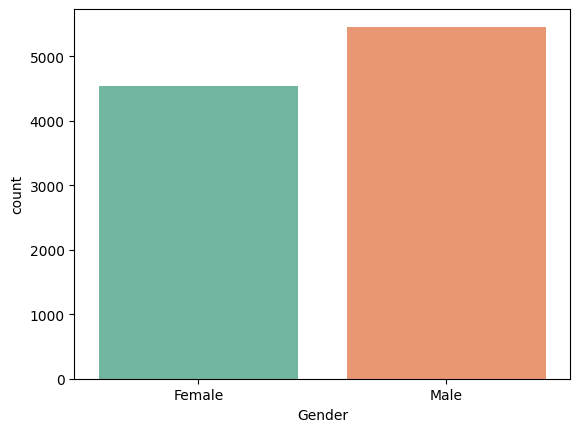

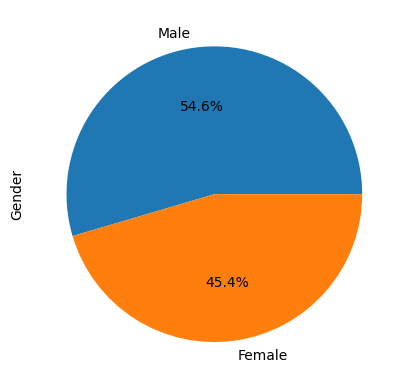

In [ ]:
# Görselleştirelim
sns.countplot(x ='Gender', data = df, palette = "Set2")

# Show the plot
plt.show()

df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xticks(rotation = 0)
plt.show()




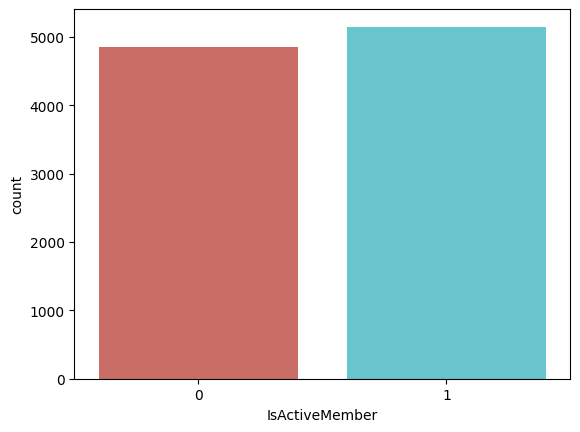

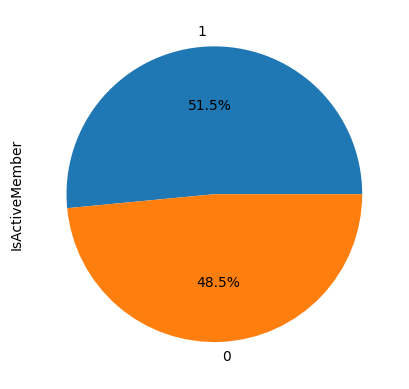

In [ ]:
# Aktif üye sayısına bakıp görselleştirelim
sns.countplot(x='IsActiveMember', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

df['IsActiveMember'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xticks(rotation = 0)
plt.show()
# aktif üye ve aktif olmayanların sayısı yakın görünüyor.

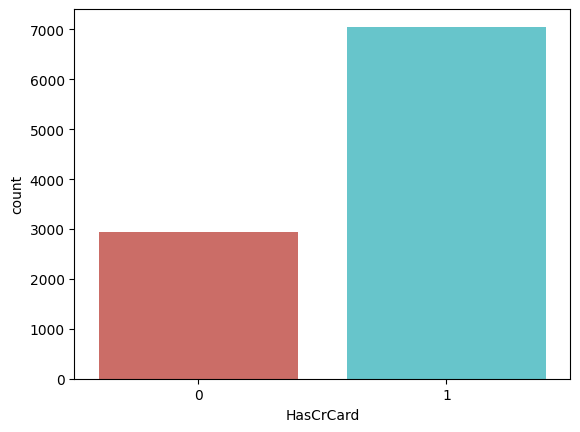

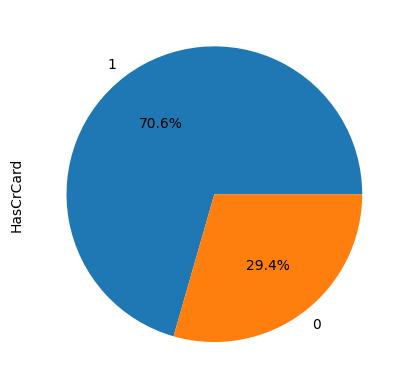

In [ ]:
# Müşterilerin Kredi karı var mı yok mu
sns.countplot(x ='HasCrCard', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

df['HasCrCard'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xticks(rotation = 0)
plt.show()

# müşterilerin çoğu kart kullanıyor.


In [ ]:
# Cinsiyet ve Yaş dağılımına bakalım
age = pd.cut(df["Age"], bins=[18,30,50,70,92])
sns.countplot(x="Gender",hue=age,data=df)

<Axes: xlabel='Gender', ylabel='count'>

In [ ]:
sns.countplot(x="Gender",hue="Geography",data=df)

<Axes: xlabel='Gender', ylabel='count'>

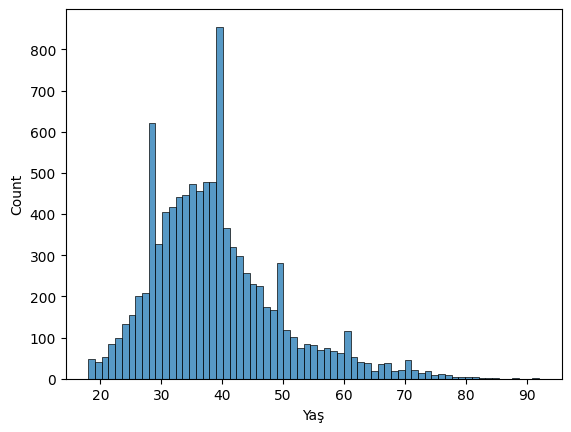

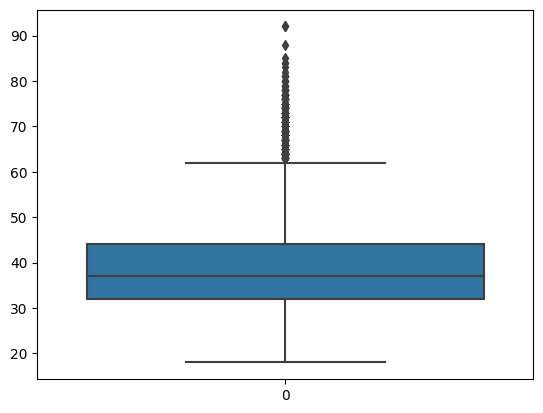

In [ ]:
sns.histplot(df["Age"])
plt.xlabel("Yaş")
plt.show()

sns.violinplot(df["Age"])
plt.show()

sns.boxplot(df["Age"])
plt.show()

# age değişkeninde outlierlar görünüyor
# müşteriler daha çok 30-50 yaş aralığında görünüyor

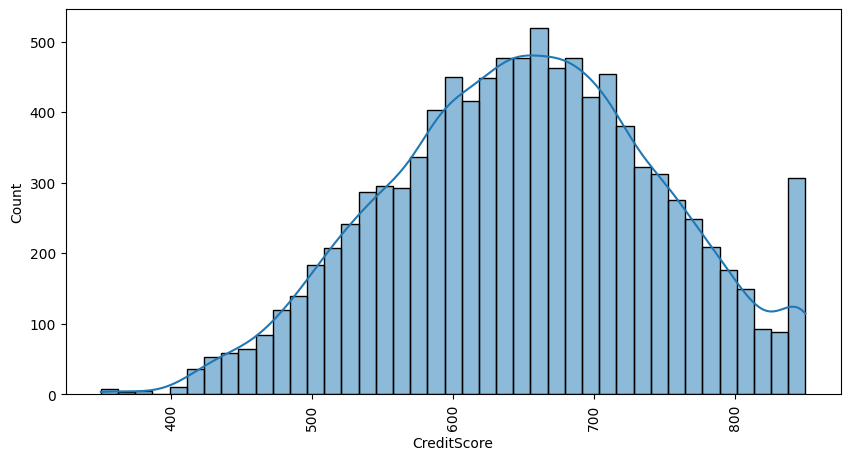

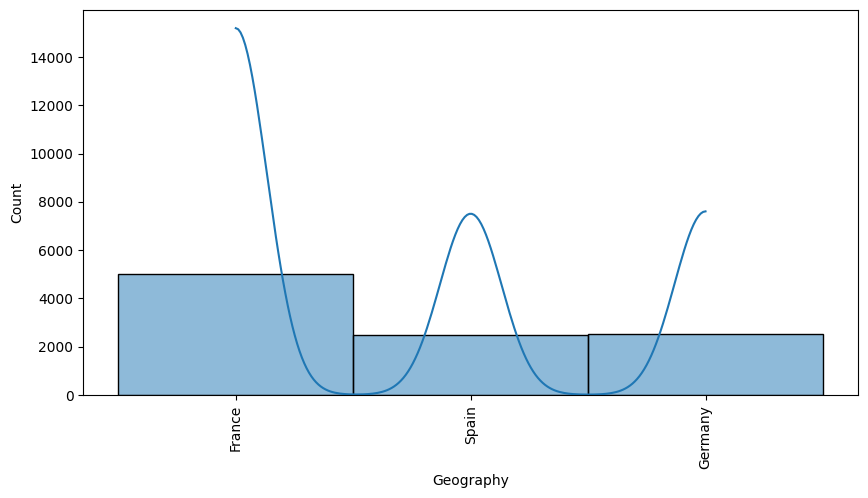

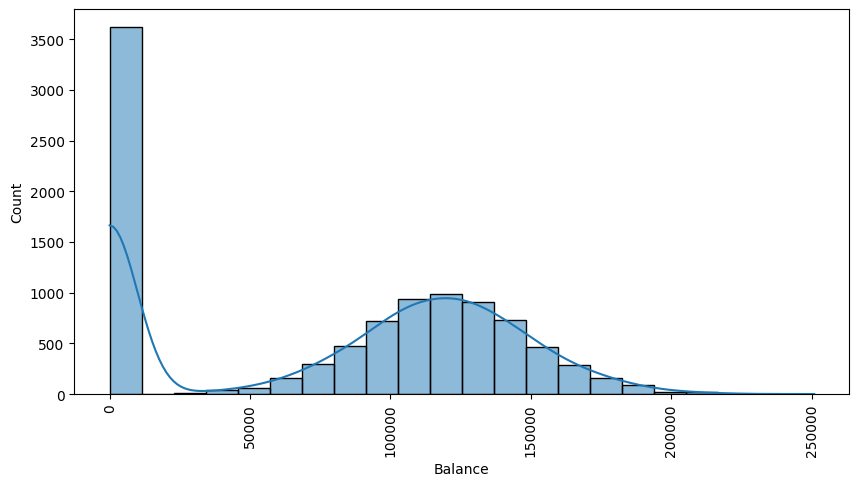

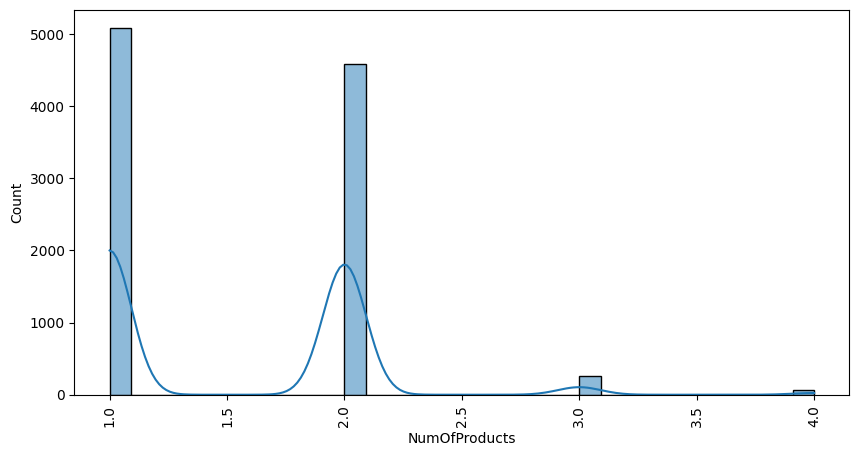

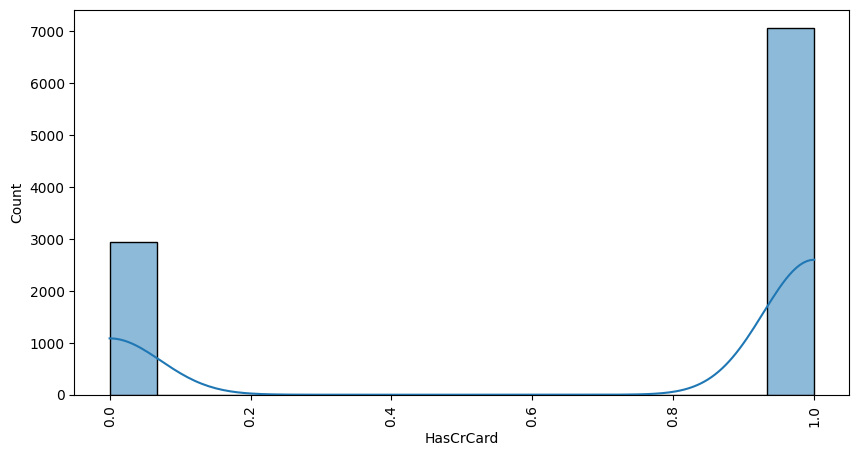

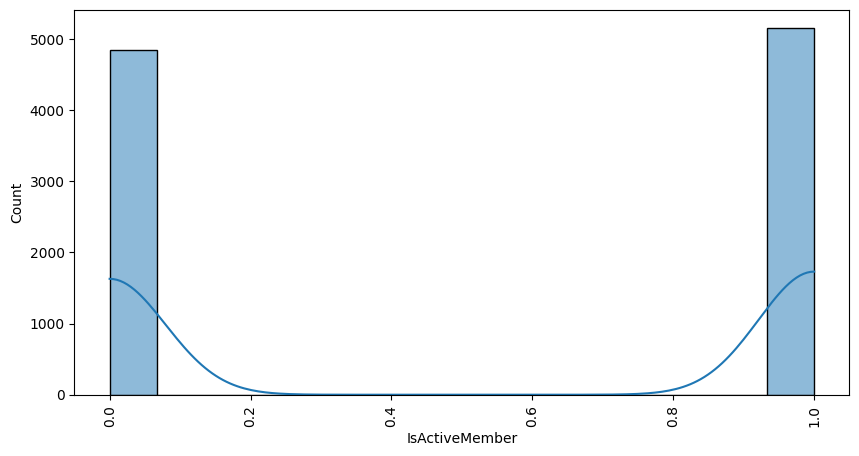

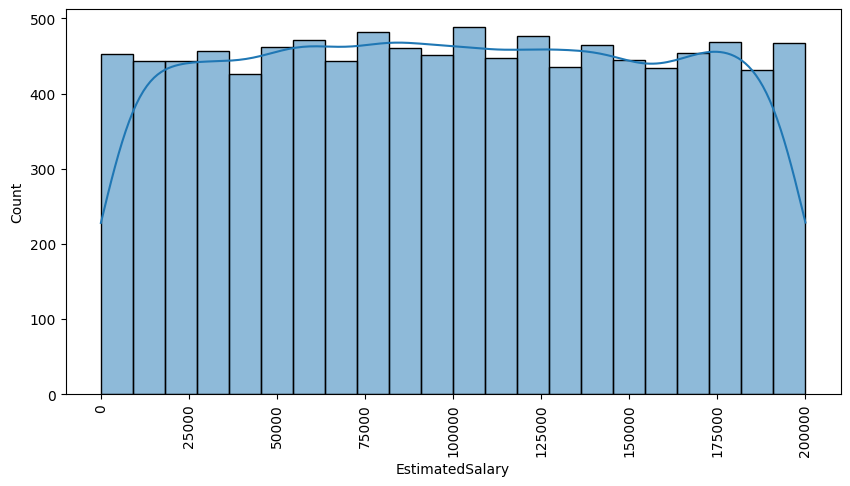

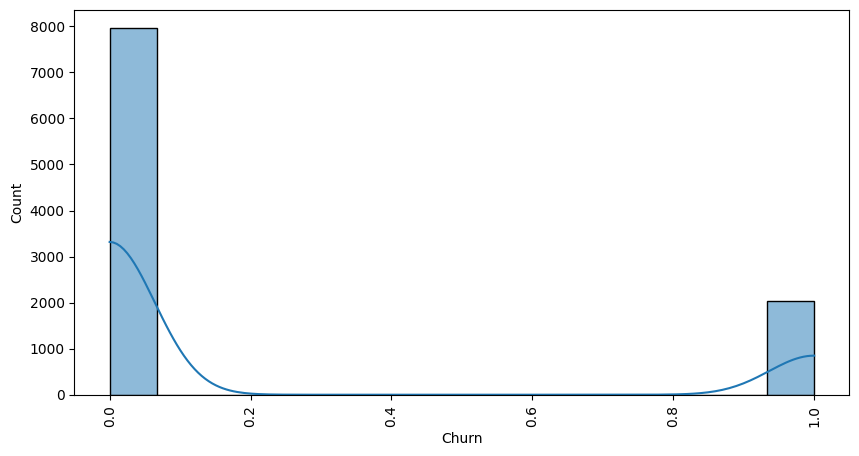

In [ ]:
# Verilerimizin dağılına bakalım
for i in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data = df[i], kde=True, multiple='stack')
    plt.xticks(rotation=90)
    plt.show()

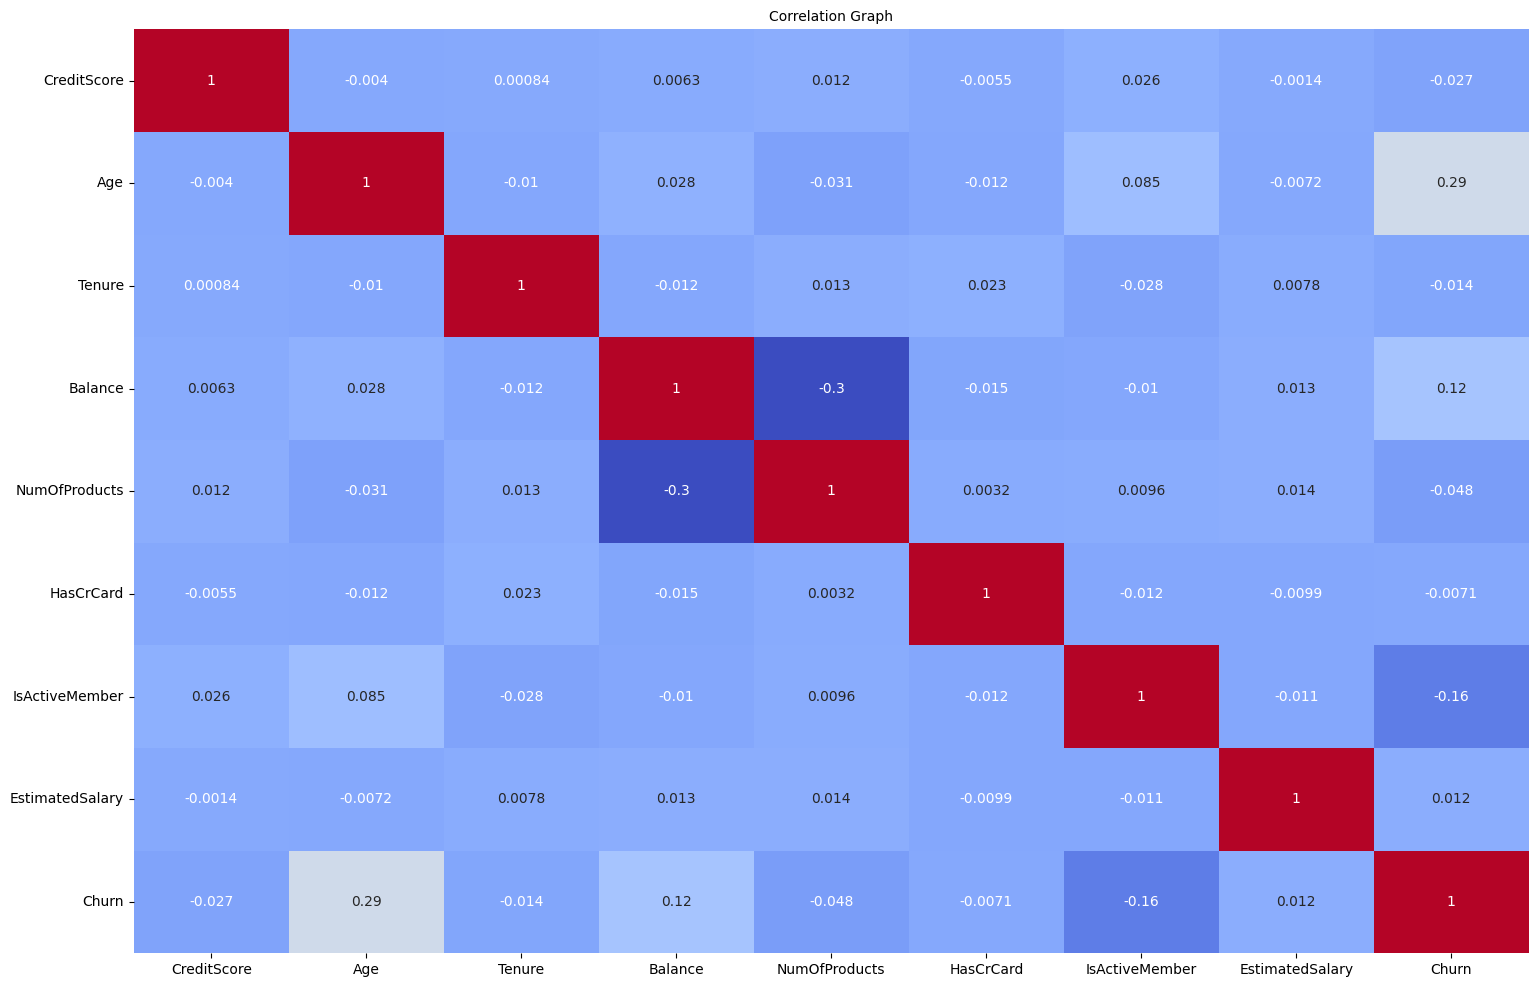

In [ ]:
# Korelasyon grafiği oluşturalım
plt.figure(figsize = [18,12])
plt.title("Correlation Graph" , fontsize = 10)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', cbar = False)
plt.show ()

# korelasyon grafiğini incelediğimizde age ile churn değişkeni arasında gözle görülür bir etkileşim görünüyor

Text(0.5, 1.0, 'Features Correlating with Churn')

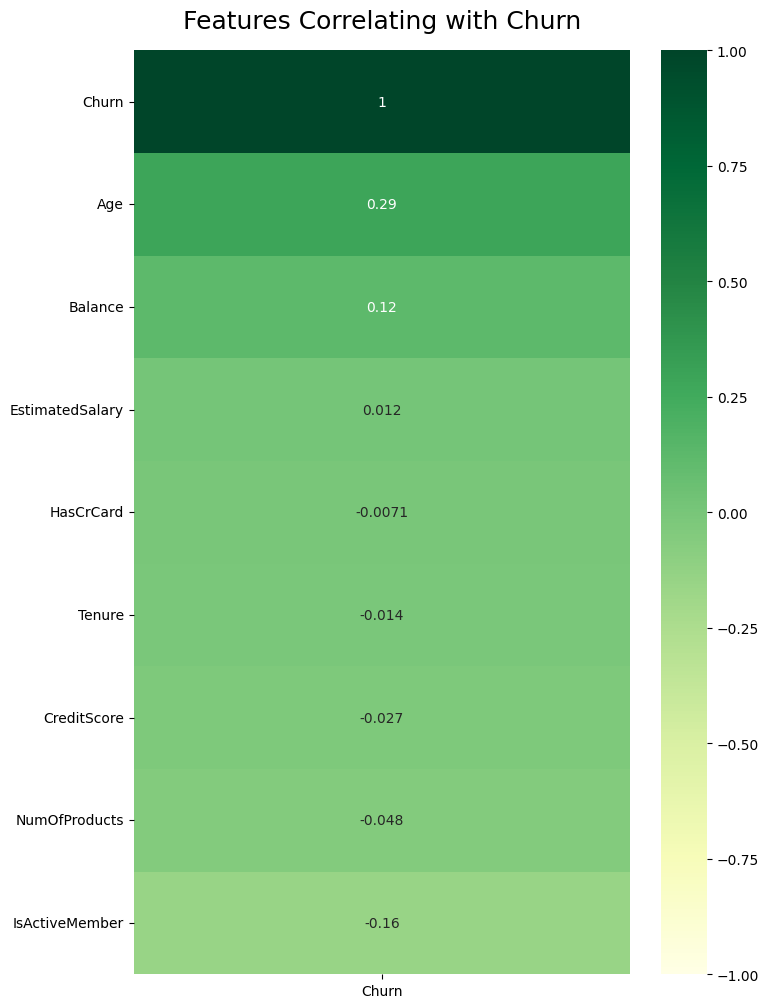

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'YlGn')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16)

# çıkardığımız grafiğe göre Churn olmaya meyilli değişkenler göründüğü üzere Age, Balance ve Estimated Salary'dir

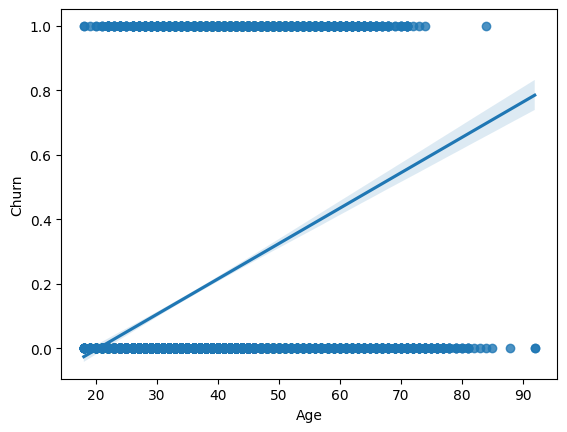

In [ ]:
# SPEARMAN GRAFİĞİ YAPIYORUZ
# pps predictive power scoring
sns.regplot(data=df, x=df["Age"], y=df["Churn"])
plt.show()

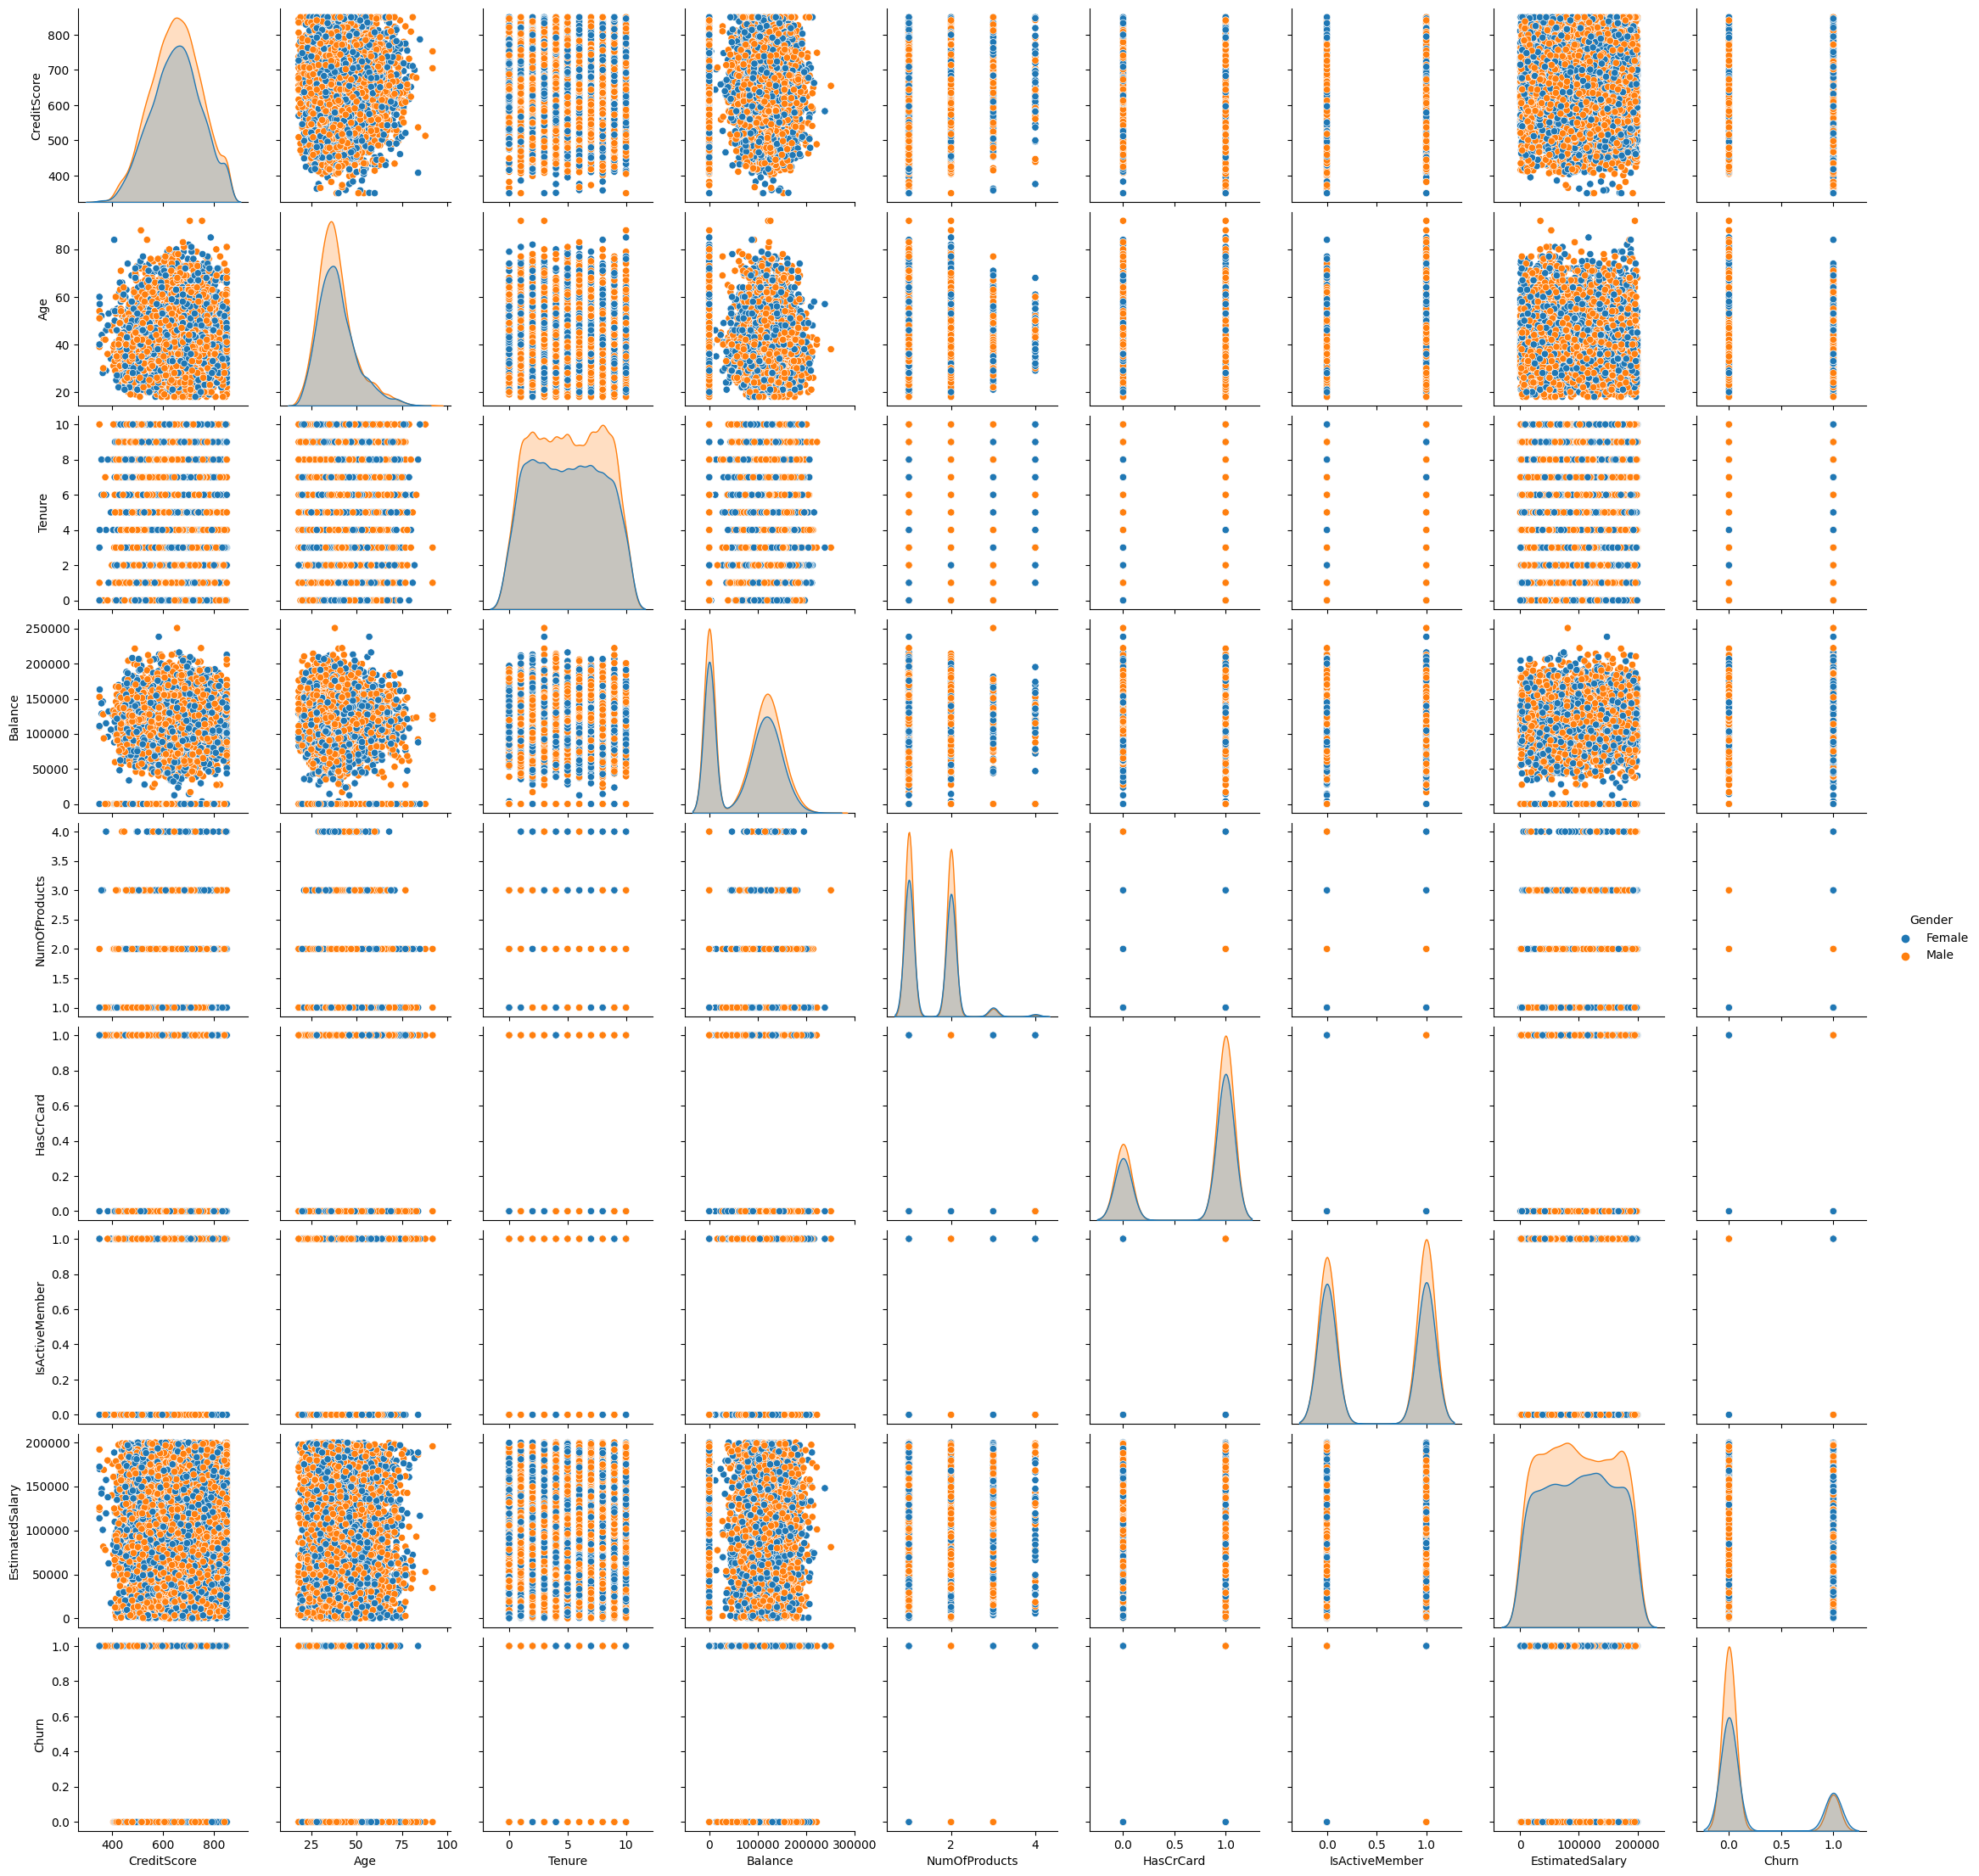

In [ ]:
# PairPlot yapalım genel haliyle görelim
sns.pairplot(df, hue = "Gender")
plt.show()


In [ ]:
# Veri setimizi kadın ve erkek olmak üzere 2'ye ayıralım
df_kadin = df[df["Gender"]=="Female"]
df_erkek = df[df["Gender"]=="Male"]

df_kadin.describe().T, df_erkek.describe().T
# yaşı educ değişkeni olarak aldık.

# kadınların yaş ortalaması = 39,24
# erkeklerin yaş ortalaması = 38,66

# kadınlarda en düşük yaş = 18
# erkeklerde en düşük yaş = 18

# kadınlarda en yüksek yaş = 85
# erkeklerde en yüksek yaş = 92

# kadınların sayısı = 4543
# erkeklerin sayısı = 5457


(                  count      mean      std    min      25%       50%       75%       max
 CreditScore     4543.00    650.83    96.79 350.00   584.00    652.00    717.00    850.00
 Age             4543.00     39.24    10.59  18.00    32.00     38.00     45.00     85.00
 Tenure          4543.00      4.97     2.91   0.00     2.00      5.00      7.00     10.00
 Balance         4543.00  75659.37 62102.47   0.00     0.00  96147.55 127141.79 238387.56
 NumOfProducts   4543.00      1.54     0.60   1.00     1.00      1.00      2.00      4.00
 HasCrCard       4543.00      0.70     0.46   0.00     0.00      1.00      1.00      1.00
 IsActiveMember  4543.00      0.50     0.50   0.00     0.00      1.00      1.00      1.00
 EstimatedSalary 4543.00 100601.54 57371.03  91.75 51224.49 101905.34 148963.12 199992.48
 Churn           4543.00      0.25     0.43   0.00     0.00      0.00      1.00      1.00,
                   count     mean      std    min      25%      50%       75%       max
 CreditScor

In [ ]:
##################################################
# Kategorik Değişken Analizi I
##################################################

In [ ]:


# birinci adımla başlıyoruz.
# bir list comprehension yapısı oluşturalım

cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
# bulduğun değişkenin tipini stringe çevir, sonra aranacak değişkenlerin içinde var mı bak demektir

In [ ]:
cat_cols

['Geography', 'Gender']

In [ ]:
# ikinci adımda kategorik değişkenlerden kaçan numerik görünen ama kategorik olan değişkenleri yakalamak

# integer ya da float olup eşsiz sınıf sayısı belirli bir değerden küçük olan değişkenleri yakala
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float"]]


In [ ]:
num_but_cat

['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Churn']

In [ ]:
# üçüncü adımda categorik gibi gözüken aslında kategorik olmayan değişkenleri görmek istiyoruz

# bazen kategorik değişkenlerin içinde gereksiz değerler olabilir örneğin bir sürü isim var diyelim
# bu kategorik gibi görünür aslında kategorik değildir. Buna cardinal denir

cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

In [ ]:
cat_but_car

[]

In [ ]:
# Madem bu ikisi aynı amaca hizmet ediyorlar bu iki comprehensionu birleştirelim

cat_cols = cat_cols + num_but_cat
cat_cols

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Churn']

In [ ]:
# Kategorik değişkenlerin özetine bakalım
def cat_summary(dataframe, col_name, plot=False):
    # plot özelliğini kapattık anlamına gelmektedir açık ya da kapalı olması bizim elimizdedir true da yazarız
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(df)}))
    #plot özelliği açıksa
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

         Geography  Ratio
France        5014  50.14
Germany       2509  25.09
Spain         2477  24.77


        Gender  Ratio
Male      5457  54.57
Female    4543  45.43


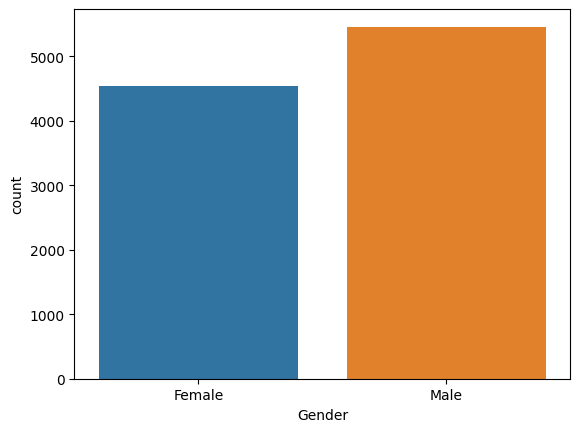

   NumOfProducts  Ratio
1           5084  50.84
2           4590  45.90
3            266   2.66
4             60   0.60


   HasCrCard  Ratio
1       7055  70.55
0       2945  29.45


   IsActiveMember  Ratio
1            5151  51.51
0            4849  48.49


   Churn  Ratio
0   7963  79.63
1   2037  20.37


In [ ]:
for col in cat_cols:
    cat_summary(df, col, plot=True)


In [ ]:
###############################################
# Sayısal Değişken Analizi
###############################################

In [ ]:
# sayısal değişkenleri nasıl analiz ederim, nasıl yakalarım
# bunu bir list comprehension ile yapalım

num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float"]]
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [ ]:
def num_summary(dataframe, numarical_col, plot=False):
        quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
        print(dataframe[numarical_col].describe(quantiles).T)
        if plot:
            dataframe[numarical_col].hist()
            plt.xlabel(numarical_col)
            plt.title(numarical_col)
            plt.show(block=True)

count   10000.00
mean      650.53
std        96.65
min       350.00
5%        489.00
10%       521.00
20%       566.00
30%       598.70
40%       627.00
50%       652.00
60%       678.00
70%       704.00
80%       735.00
90%       778.00
95%       812.00
99%       850.00
max       850.00
Name: CreditScore, dtype: float64


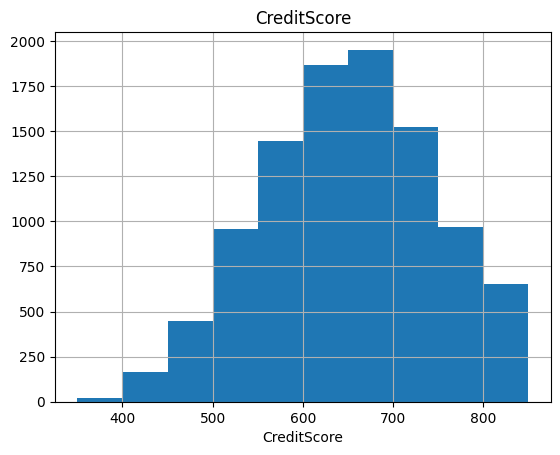

count   10000.00
mean       38.92
std        10.49
min        18.00
5%         25.00
10%        27.00
20%        31.00
30%        33.00
40%        35.00
50%        37.00
60%        40.00
70%        42.00
80%        46.00
90%        53.00
95%        60.00
99%        72.00
max        92.00
Name: Age, dtype: float64


count   10000.00
mean        5.01
std         2.89
min         0.00
5%          1.00
10%         1.00
20%         2.00
30%         3.00
40%         4.00
50%         5.00
60%         6.00
70%         7.00
80%         8.00
90%         9.00
95%         9.00
99%        10.00
max        10.00
Name: Tenure, dtype: float64


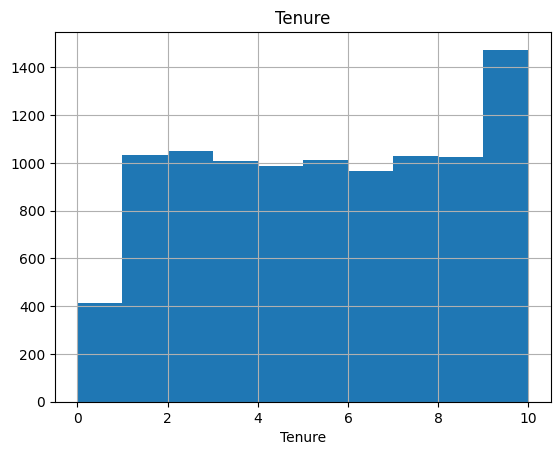

count    10000.00
mean     76485.89
std      62397.41
min          0.00
5%           0.00
10%          0.00
20%          0.00
30%          0.00
40%      73080.91
50%      97198.54
60%     110138.93
70%     122029.87
80%     133710.36
90%     149244.79
95%     162711.67
99%     185967.99
max     250898.09
Name: Balance, dtype: float64


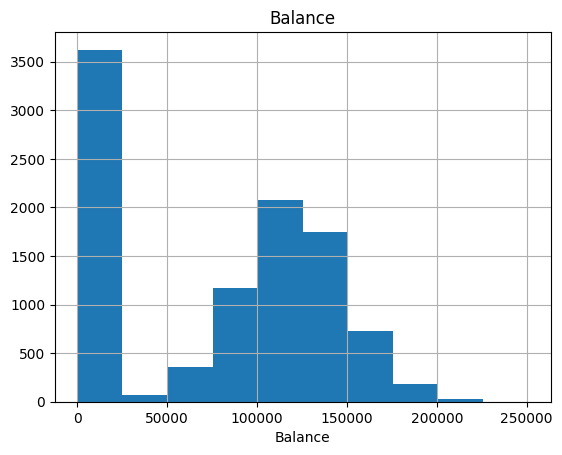

count    10000.00
mean    100090.24
std      57510.49
min         11.58
5%        9851.82
10%      20273.58
20%      41050.74
30%      60736.08
40%      80238.34
50%     100193.91
60%     119710.04
70%     139432.24
80%     159836.73
90%     179674.70
95%     190155.38
99%     198069.73
max     199992.48
Name: EstimatedSalary, dtype: float64


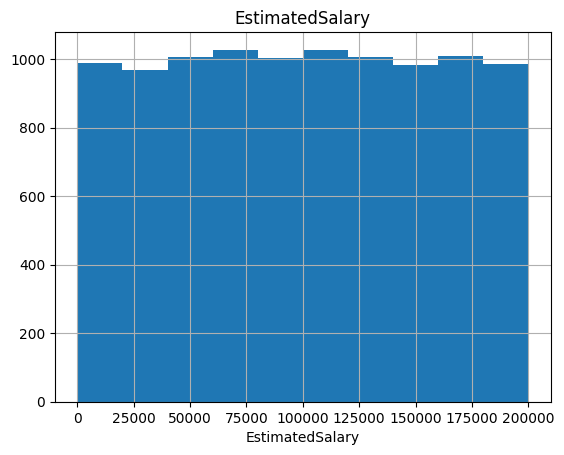

In [ ]:
# bütün numerik değişkenlere uygulamak istersek
for col in num_cols:
     num_summary(df, col, plot=True)

In [ ]:
############################################################
# HEDEF DEĞİŞKEN ANALİZİ
############################################################


In [ ]:
#########################################
# Hedef değişkenin kategorik değişkenler ile analizi
#########################################

In [ ]:
# şimdi bütün kategorik değişkenlere uygulayabileceğimiz bir fonksiyon yazıyoruz
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"Target Mean:": dataframe.groupby(categorical_col)[target].mean()}))


for col in cat_cols:
    target_summary_with_cat(df,"Churn", col)
    print("######################################")

           Target Mean:
Geography              
France             0.16
Germany            0.32
Spain              0.17
######################################
        Target Mean:
Gender              
Female          0.25
Male            0.16
######################################
               Target Mean:
NumOfProducts              
1                      0.28
2                      0.08
3                      0.83
4                      1.00
######################################
           Target Mean:
HasCrCard              
0                  0.21
1                  0.20
######################################
                Target Mean:
IsActiveMember              
0                       0.27
1                       0.14
######################################
       Target Mean:
Churn              
0              0.00
1              1.00
######################################


In [ ]:
#######################################################
# Hedef Değişkenin Sayısal Değişkenler ile Analizi
#######################################################


In [ ]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
    print("###################################################")


for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       CreditScore
Churn             
0           651.85
1           645.35


###################################################
        Age
Churn      
0     37.41
1     44.84


###################################################
       Tenure
Churn        
0        5.03
1        4.93


###################################################
       Balance
Churn         
0     72745.30
1     91108.54


###################################################
       EstimatedSalary
Churn                 
0             99738.39
1            101465.68


###################################################


In [ ]:
#######################################################
# Pivot Table
#######################################################

# burada veri setimizle ilgili çıkarımlar yapacağız
# veri setimizi getirelim
df.head()


CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Churn
0          619    France  Female   42       2      0.00              1          1               1        101348.88      1
1          608     Spain  Female   41       1  83807.86              1          0               1        112542.58      0
2          502    France  Female   42       8 159660.80              3          1               0        113931.57      1
3          699    France  Female   39       1      0.00              2          0               0         93826.63      0
4          850     Spain  Female   43       2 125510.82              1          1               1         79084.10      0

In [ ]:
# kadın ve erkeklerin yaş aralıklarına kredi skorları arasındaki durum
yas = pd.cut(df['Age'], [18,30,50,70,90])
df.pivot_table("CreditScore", df["Gender"], yas, aggfunc='mean')

# bu tabloya bakıldığında aralarında gözle görülebilir bir fark bulunmamaktadır

Age     (18, 30]  (30, 50]  (50, 70]  (70, 90]
Gender                                        
Female    648.83    651.89    646.92    658.82
Male      652.42    649.36    649.12    664.86

In [ ]:
yas = pd.cut(df['Age'], [18,30,50,70,90])
df.pivot_table("CreditScore", df["Gender"], yas, aggfunc='count')

Age     (18, 30]  (30, 50]  (50, 70]  (70, 90]
Gender                                        
Female       876      3059       538        66
Male        1070      3712       590        65

<Axes: xlabel='Gender'>

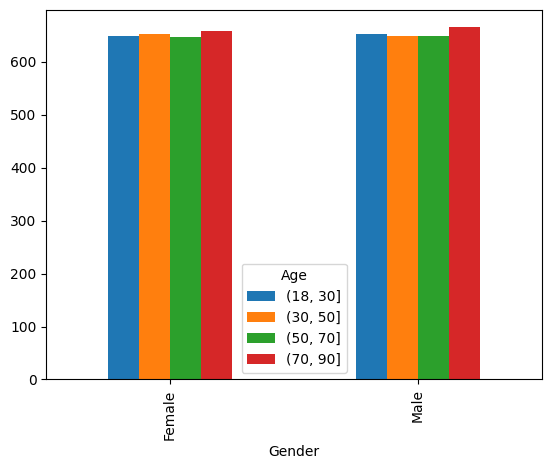

In [ ]:
# Görselleştirelim
yas = pd.cut(df['Age'], [18,30,50,70,90])
df.pivot_table("CreditScore", df["Gender"], yas, aggfunc='mean').plot(kind="bar")

<Axes: xlabel='Gender'>

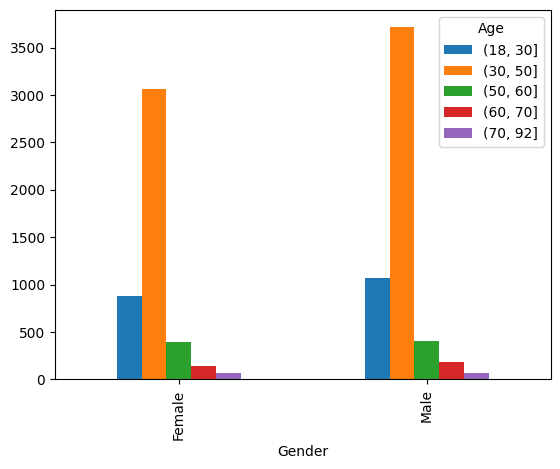

In [ ]:
# kaç kişi olduğunu görselleştirelim
yas = pd.cut(df['Age'], [18,30,50,60,70,92])
df.pivot_table("CreditScore", df["Gender"], yas, aggfunc='count').plot(kind="bar")

In [ ]:
# kadın ve erkeklerin yaş aralıklarına göre churn durumu
yas = pd.cut(df['Age'], [18,30,50,60,70,92])
df.pivot_table("Churn", df["Gender"], yas, aggfunc='mean')

# burada kadınlar erkeklere göre churn olmaya daha meyilli diyebiliriz

Age     (18, 30]  (30, 50]  (50, 60]  (60, 70]  (70, 92]
Gender                                                  
Female      0.10      0.24      0.65      0.39      0.11
Male        0.06      0.16      0.48      0.26      0.06

In [ ]:
yas = pd.cut(df['Age'], [18,30,50,60,70,92])
df.pivot_table("Churn", df["Gender"], yas, aggfunc='count')

Age     (18, 30]  (30, 50]  (50, 60]  (60, 70]  (70, 92]
Gender                                                  
Female       876      3059       391       147        66
Male        1070      3712       406       184        67

In [ ]:
# Görselleştirelim
yas = pd.cut(df['Age'], [18,30,50,60,70,92])
df.pivot_table("Churn", df["Gender"], yas, aggfunc='mean').plot(kind="bar")

<Axes: xlabel='Gender'>

In [ ]:
# kaç kişi olduğunu görselleştirelim
yas = pd.cut(df['Age'], [18,30,50,70,90])
df.pivot_table("Churn", df["Gender"], yas, aggfunc='count').plot(kind="bar")

<Axes: xlabel='Gender'>

In [ ]:
# Ülkelere göre churn durumlarına bakalım
yas = pd.cut(df['Age'], [18,30,50,70,90])
df.pivot_table("Churn", df[["Gender", "Geography"]], yas, aggfunc='mean')

# bu tabloyu incelediğimizde churn durumlarının ülkelere göre en fazla 50-70 yaş aralığında olduğunu söylebiliriz
# Emekli olma durumu churn olmaya etken diyebiliriz


Age               (18, 30]  (30, 50]  (50, 70]  (70, 90]
Gender Geography                                        
Female France         0.06      0.19      0.55      0.08
       Germany        0.16      0.36      0.71      0.25
       Spain          0.12      0.20      0.46      0.00
Male   France         0.04      0.12      0.35      0.03
       Germany        0.10      0.28      0.58      0.00
       Spain          0.05      0.12      0.33      0.17

In [ ]:
yas = pd.cut(df['Age'], [18,30,50,70,90])
df.pivot_table("Churn", df[["Gender", "Geography"]], yas, aggfunc='count')
# orta yaşlı yani 50-60 yaş arasındakiler churn olmaya daha meyilli gibi duruyor

Age               (18, 30]  (30, 50]  (50, 70]  (70, 90]
Gender Geography                                        
Female France          460      1517       244        38
       Germany         206       803       166        16
       Spain           210       739       128        12
Male   France          567      1861       284        30
       Germany         241       897       157        17
       Spain           262       954       149        18

<Axes: xlabel='Gender,Geography'>

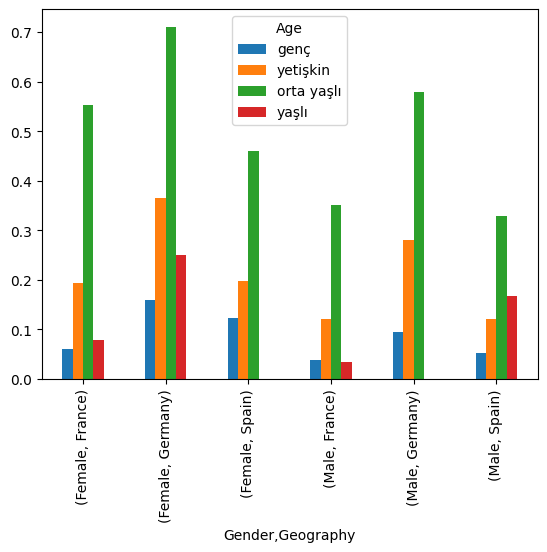

In [ ]:
# Görselleştirelim
yas = pd.cut(df['Age'], [18,30,50,70,90],labels=["genç", "yetişkin", "orta yaşlı", "yaşlı"])
df.pivot_table("Churn", df[["Gender", "Geography"]], yas, aggfunc='mean').plot(kind="bar")

<Axes: xlabel='Gender,Geography'>

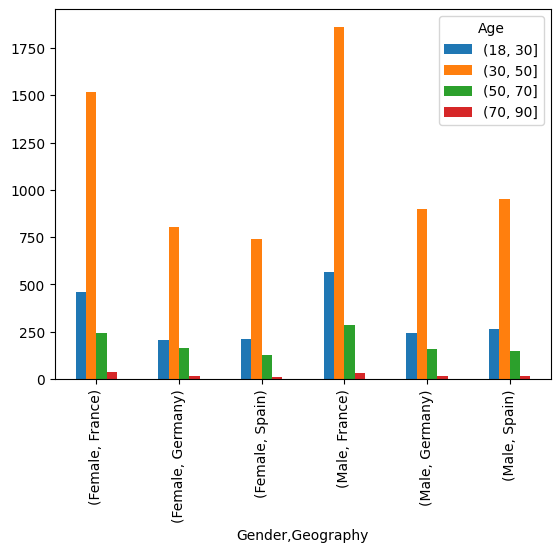

In [ ]:
yas = pd.cut(df['Age'], [18,30,50,70,90])
df.pivot_table("Churn", df[["Gender", "Geography"]], yas, aggfunc='count').plot(kind="bar")

In [ ]:
# Müşterinin aktif olup olmaması Churn'e sebep olur mu?
# aktif olmaması churne sebep olur sonucunu çıkarabiliriz

df.pivot_table("Churn", df["Gender"], df["IsActiveMember"], aggfunc='mean')

IsActiveMember    0    1
Gender                  
Female         0.32 0.18
Male           0.22 0.11

In [ ]:
df.pivot_table("Churn", df["Gender"], df["IsActiveMember"], aggfunc='count')

IsActiveMember     0     1
Gender                    
Female          2259  2284
Male            2590  2867

<Axes: xlabel='Gender'>

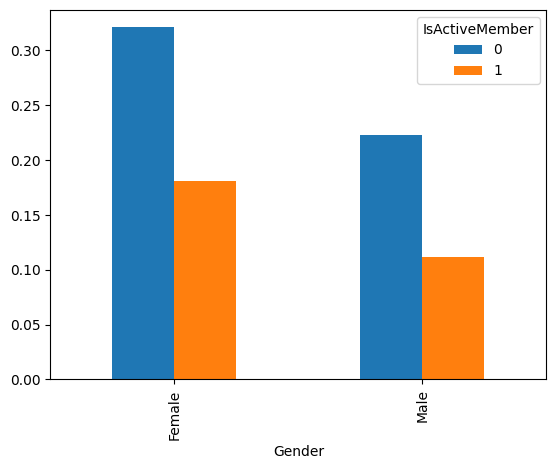

In [ ]:
# görselleştirelim
df.pivot_table("Churn", df["Gender"], df["IsActiveMember"], aggfunc='mean').plot(kind="bar")

<Axes: xlabel='Gender'>

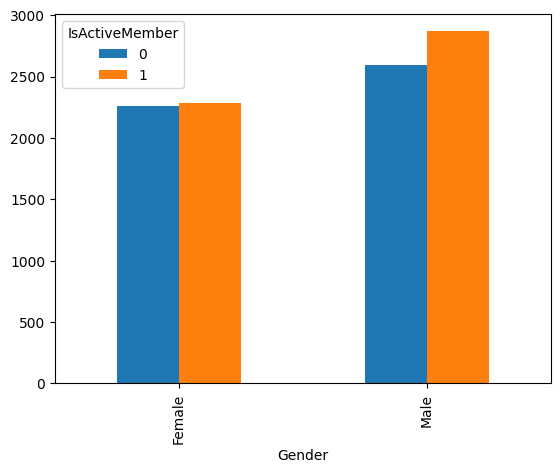

In [ ]:
df.pivot_table("Churn", df["Gender"], df["IsActiveMember"], aggfunc='count').plot(kind="bar")

In [ ]:
	# Kredi kartının olup olmaması Churn'e sebep olur mu?
	# count at

df.pivot_table("Churn", df["Gender"], df["HasCrCard"], aggfunc='mean')


HasCrCard    0    1
Gender             
Female    0.25 0.25
Male      0.17 0.16

In [ ]:
df.pivot_table("Churn", df["Gender"], df["HasCrCard"], aggfunc='count')

HasCrCard     0     1
Gender               
Female     1351  3192
Male       1594  3863

<Axes: xlabel='Gender'>

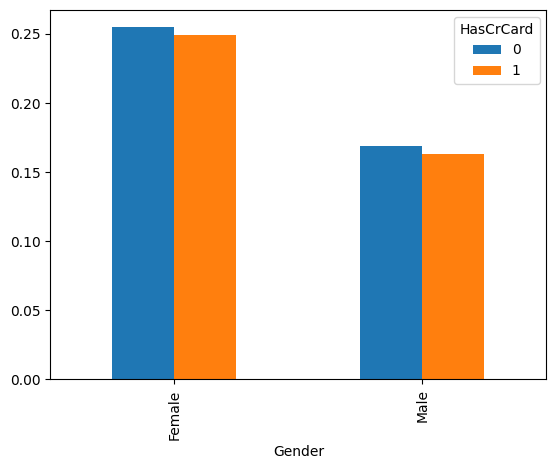

In [ ]:
# Görselleştirelim
df.pivot_table("Churn", df["Gender"], df["HasCrCard"], aggfunc='mean').plot(kind="bar")

<Axes: xlabel='Gender'>

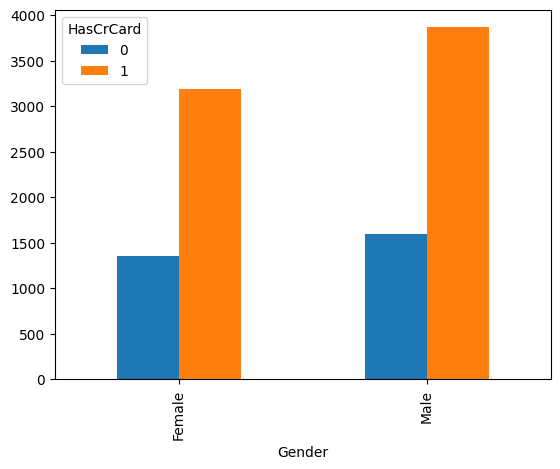

In [ ]:
df.pivot_table("Churn", df["Gender"], df["HasCrCard"], aggfunc='count').plot(kind="bar")

In [ ]:
# Cinsiyet ve kalım süresinin churn üzerindeki durumuna bakalım
kalma_suresi = pd.cut(df["Tenure"], bins = [0,2,4,6,10])
df.pivot_table("Churn", df["Gender"], kalma_suresi, aggfunc='mean')
# kadınlar erkeklere görechurn olmaya daha meyilli gibi görünüyor.


Tenure  (0, 2]  (2, 4]  (4, 6]  (6, 10]
Gender                                 
Female    0.25    0.25    0.25     0.25
Male      0.17    0.17    0.16     0.15

In [ ]:
kalma_suresi = pd.cut(df["Tenure"], bins = [0,2,4,6,10])
df.pivot_table("Churn", df["Gender"], kalma_suresi, aggfunc='count')

Tenure  (0, 2]  (2, 4]  (4, 6]  (6, 10]
Gender                                 
Female     958     911     906     1564
Male      1125    1087    1073     1963

<Axes: xlabel='Gender'>

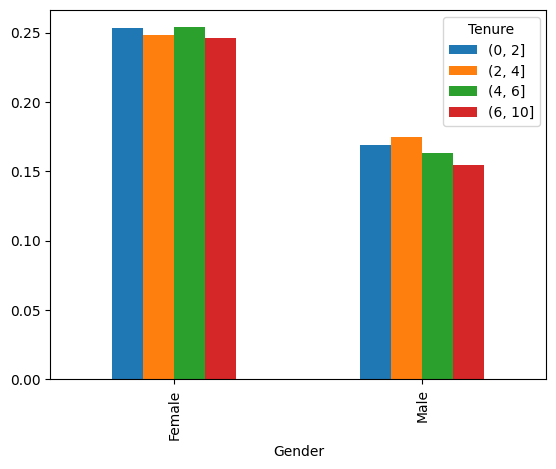

In [ ]:
# Görselleştirelim
df.pivot_table("Churn", df["Gender"], kalma_suresi, aggfunc='mean').plot(kind="bar")

<Axes: xlabel='Gender'>

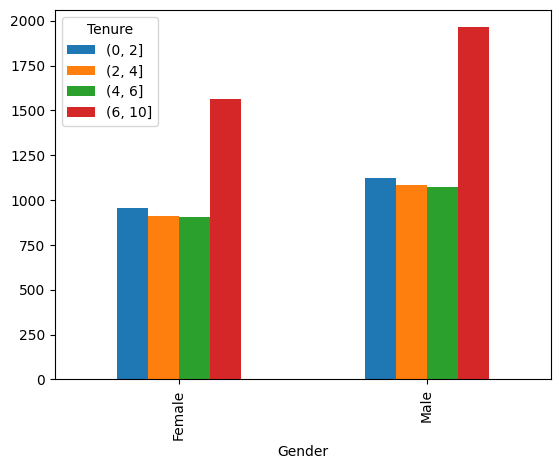

In [ ]:
kalma_suresi = pd.cut(df["Tenure"], bins = [0,2,4,6,10])
df.pivot_table("Churn", df["Gender"], kalma_suresi, aggfunc='count').plot(kind="bar")

In [ ]:
# Kredi skorları ve churn arasındaki ilişkiye bakalım
kalma_suresi = pd.cut(df["Tenure"], bins = [0,2,4,6,10])
kredi = pd.cut(df["CreditScore"], bins=[350,500,650,850])
df.pivot_table("Churn", kredi, kalma_suresi, aggfunc='mean')


Tenure       (0, 2]  (2, 4]  (4, 6]  (6, 10]
CreditScore                                 
(350, 500]     0.20    0.28    0.19     0.24
(500, 650]     0.23    0.22    0.20     0.20
(650, 850]     0.19    0.19    0.21     0.19

In [ ]:
kalma_suresi = pd.cut(df["Tenure"], bins = [0,2,4,6,10])
kredi = pd.cut(df["CreditScore"], bins=[350,500,650,850])
df.pivot_table("Churn", kredi, kalma_suresi, aggfunc='count')

Tenure       (0, 2]  (2, 4]  (4, 6]  (6, 10]
CreditScore                                 
(350, 500]      136     121     140      225
(500, 650]      874     870     845     1521
(650, 850]     1072    1006     994     1780

<Axes: xlabel='CreditScore'>

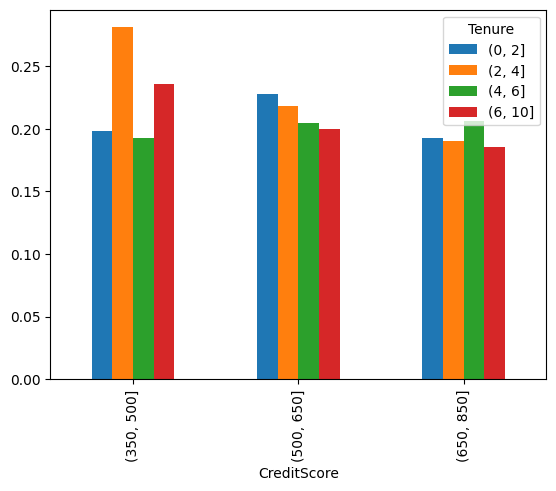

In [ ]:
# Görselleştirelim
df.pivot_table("Churn", kredi, kalma_suresi, aggfunc='mean').plot(kind="bar")


In [ ]:
kalma_suresi = pd.cut(df["Tenure"], bins = [0,2,4,6,10])
kredi = pd.cut(df["CreditScore"], bins=[350,500,650,850])
df.pivot_table("Churn", kredi, kalma_suresi, aggfunc='count').plot(kind="bar")

<Axes: xlabel='CreditScore'>

In [ ]:
#########################################
# Güven Aralıkları ( Confidence Intervals )
#########################################

In [ ]:
# Değişkenlerimizin %95 düzeyindeki güven aralığına bakalım
def guven_araligi(data,columns):
  # bunun için bir güven aralığı oluşturuyoruz
  print(f"********{columns}********")
  aralik = sms.DescrStatsW(data[columns]).tconfint_mean()
  return aralik




In [ ]:
num_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [ ]:
guven_araligi(df, "Age")
# Yaş %95 güven aralığı ile (38.716217885407524, 39.12738211459247) arasındadır arasındadır

********Age********


(38.716217885407524, 39.12738211459247)

In [ ]:
guven_araligi(df, "CreditScore")

********CreditScore********


(648.6342008168427, 652.4233991831574)

In [ ]:
# Kredi skorlarını %95 güven aralığı ile (648.6342008168427, 652.4233991831574) arasındadır arasındadır

In [ ]:
guven_araligi(df, "Tenure")
# Görev süresi %95 güven aralığı ile (4.95610756131494, 5.069492438685061) arasındadır arasındadır

********Tenure********


(4.95610756131494, 5.069492438685061)

In [ ]:
guven_araligi(df, "Balance")
# Bakiye %95 güven aralığı ile (75262.77456275589, 77709.00401324412) arasındadır arasındadır

********Balance********


(75262.77456275589, 77709.00401324412)

In [ ]:
guven_araligi(df, "EstimatedSalary")
# Tahmini maaş %95 güven aralığı ile (98962.9184740726, 101217.5612879274) arasındadır arasındadır

********EstimatedSalary********


(98962.9184740726, 101217.5612879274)

In [ ]:
############################################################
# T test
############################################################

In [ ]:
# veri setimizi getirelim
df.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Churn
0          619    France  Female   42       2      0.00              1          1               1        101348.88      1
1          608     Spain  Female   41       1  83807.86              1          0               1        112542.58      0
2          502    France  Female   42       8 159660.80              3          1               0        113931.57      1
3          699    France  Female   39       1      0.00              2          0               0         93826.63      0
4          850     Spain  Female   43       2 125510.82              1          1               1         79084.10      0

In [ ]:
# veri setimizi kadın ve erkek diye ayırmıştık onları getirelim
df_erkek.head()

CreditScore Geography Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Churn
5           645     Spain   Male   44       8 113755.78              2          1               0        149756.71      1
6           822    France   Male   50       7      0.00              2          1               1         10062.80      0
8           501    France   Male   44       4 142051.07              2          0               1         74940.50      0
9           684    France   Male   27       2 134603.88              1          1               1         71725.73      0
10          528    France   Male   31       6 102016.72              2          0               0         80181.12      0

In [ ]:
df_kadin.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Churn
0          619    France  Female   42       2      0.00              1          1               1        101348.88      1
1          608     Spain  Female   41       1  83807.86              1          0               1        112542.58      0
2          502    France  Female   42       8 159660.80              3          1               0        113931.57      1
3          699    France  Female   39       1      0.00              2          0               0         93826.63      0
4          850     Spain  Female   43       2 125510.82              1          1               1         79084.10      0

In [ ]:
# kadın ve erkeklerin kredi skorları arasında anlamlı bir farklılık var mı?
st.ttest_ind(df_kadin["CreditScore"], df_erkek["CreditScore"], equal_var=False)
# pozitif yönde bir korelasyon vardır ama anlamlı bir farklılık yoktur.

Ttest_indResult(statistic=0.28557043108373503, pvalue=0.7752132738233501)

In [ ]:
# kadın ve erkekler arasında bakiye arasında anlamlı bir fark var mıdır?
st.ttest_ind(df_kadin["Balance"], df_erkek["Balance"], equal_var=False)
# negatif yönlü bir korelasyon vardır ama anlamlı bir fark yoktur.

Ttest_indResult(statistic=-1.209575453303373, pvalue=0.22647131768566747)

In [ ]:
# kadın ve erkeklerin tahminlenmiş maaşının arasında anlamlı bir fark var mıdır.
st.ttest_ind(df_kadin["EstimatedSalary"], df_erkek["EstimatedSalary"], equal_var=False)
# kadın ve erkeklerin maaşı arasında anlamlı bir farklılık yoktur.

Ttest_indResult(statistic=0.8115110636434406, pvalue=0.41709218057355446)

In [ ]:
#################################################
# Feature Engineering
#################################################


In [ ]:
# veri setimizi tekrar getirelim ve neler yapacağımıza bir göz atalım
df.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Churn
0          619    France  Female   42       2      0.00              1          1               1        101348.88      1
1          608     Spain  Female   41       1  83807.86              1          0               1        112542.58      0
2          502    France  Female   42       8 159660.80              3          1               0        113931.57      1
3          699    France  Female   39       1      0.00              2          0               0         93826.63      0
4          850     Spain  Female   43       2 125510.82              1          1               1         79084.10      0

In [ ]:
# yaş değişkenini bölelim
# Age değişkeninde 18-30=1 , 30-60 ,60+ olarak atadım
df.loc[(df['Age'] >= 18) & (df['Age'] < 30), "NewAge"] = 'young'
df.loc[(df['Age'] >= 30) & (df['Age'] <= 60), "NewAge"] = 'middleage'
df.loc[(df['Age'] > 60), "NewAge"] = 'old'

In [ ]:
df.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Churn     NewAge
0          619    France  Female   42       2      0.00              1          1               1        101348.88      1  middleage
1          608     Spain  Female   41       1  83807.86              1          0               1        112542.58      0  middleage
2          502    France  Female   42       8 159660.80              3          1               0        113931.57      1  middleage
3          699    France  Female   39       1      0.00              2          0               0         93826.63      0  middleage
4          850     Spain  Female   43       2 125510.82              1          1               1         79084.10      0  middleage

In [ ]:
# Kredi Skorlarını bölelim
df.loc[(df['CreditScore'] >= 350) & (df['CreditScore'] < 500), "NewCreditScore"] = 'low'
df.loc[(df['CreditScore'] >= 500) & (df['CreditScore'] <= 650), "NewCreditScore"] = 'middle'
df.loc[(df['CreditScore'] > 650), "NewCreditScore"] = 'high'

In [ ]:
df.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Churn     NewAge NewCreditScore
0          619    France  Female   42       2      0.00              1          1               1        101348.88      1  middleage         middle
1          608     Spain  Female   41       1  83807.86              1          0               1        112542.58      0  middleage         middle
2          502    France  Female   42       8 159660.80              3          1               0        113931.57      1  middleage         middle
3          699    France  Female   39       1      0.00              2          0               0         93826.63      0  middleage           high
4          850     Spain  Female   43       2 125510.82              1          1               1         79084.10      0  middleage           high

In [ ]:
# kategorik değişkenlerimize tekrar bakalım
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols

['Geography', 'Gender', 'NewAge', 'NewCreditScore']

In [ ]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float"]]
num_but_cat

['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Churn']

In [ ]:
cat_cols = cat_cols + num_but_cat
cat_cols

['Geography',
 'Gender',
 'NewAge',
 'NewCreditScore',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Churn']

In [ ]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_car

[]

         Geography  Ratio
France        5014  50.14
Germany       2509  25.09
Spain         2477  24.77


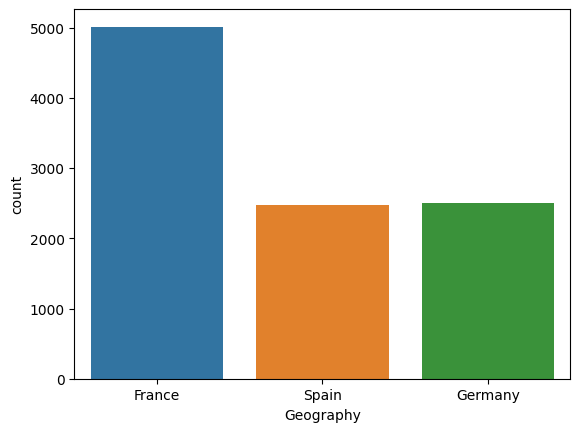

        Gender  Ratio
Male      5457  54.57
Female    4543  45.43


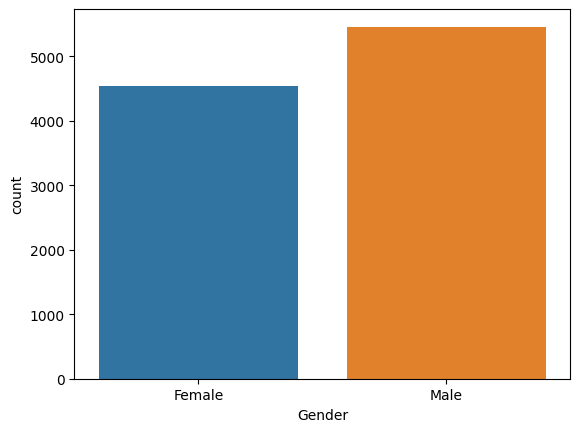

           NewAge  Ratio
middleage    7895  78.95
young        1641  16.41
old           464   4.64


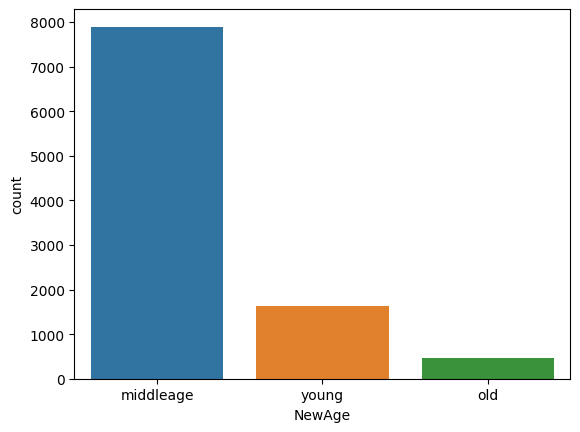

        NewCreditScore  Ratio
high              5063  50.63
middle            4305  43.05
low                632   6.32


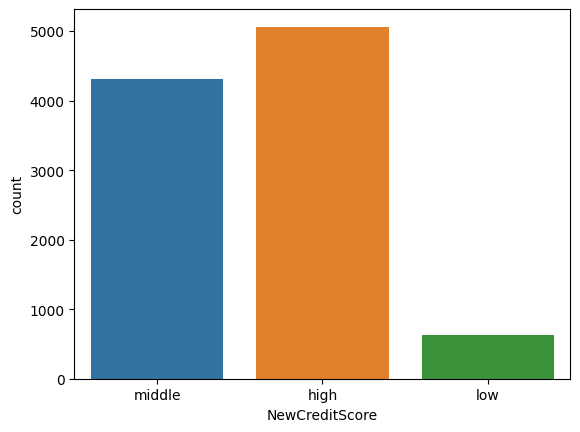

   NumOfProducts  Ratio
1           5084  50.84
2           4590  45.90
3            266   2.66
4             60   0.60


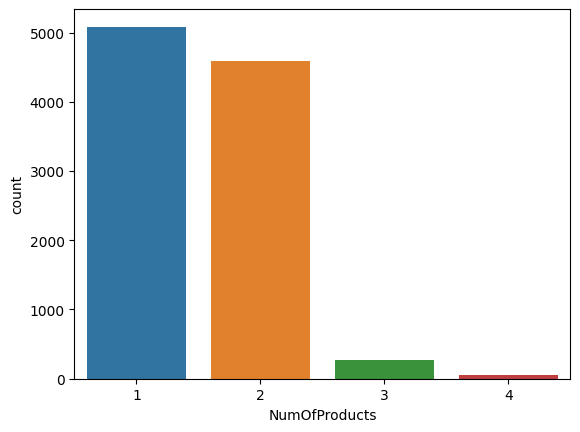

   HasCrCard  Ratio
1       7055  70.55
0       2945  29.45


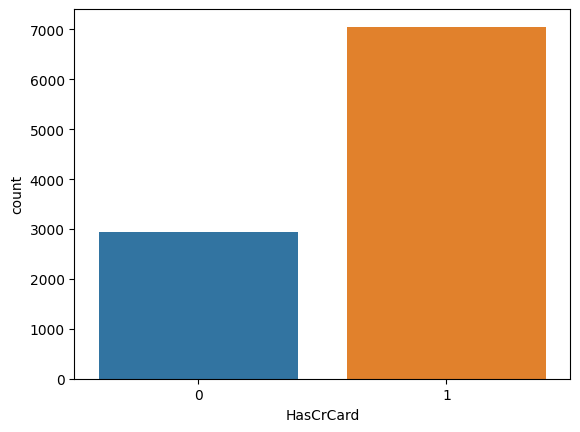

   IsActiveMember  Ratio
1            5151  51.51
0            4849  48.49


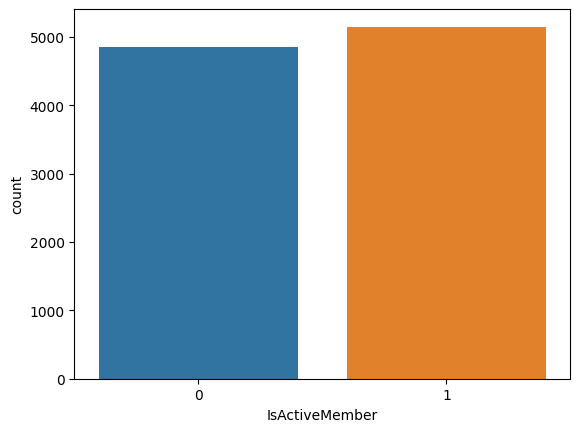

   Churn  Ratio
0   7963  79.63
1   2037  20.37


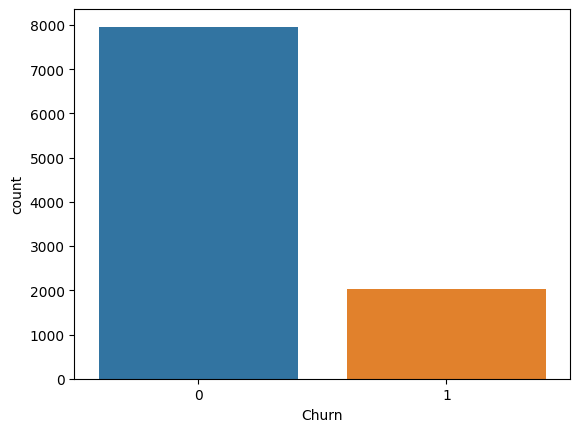

In [ ]:
# görselleştirelim
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [ ]:
# numerik değişkenlere bakalım
num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float"]]
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

count   10000.00
mean      650.53
std        96.65
min       350.00
5%        489.00
10%       521.00
20%       566.00
30%       598.70
40%       627.00
50%       652.00
60%       678.00
70%       704.00
80%       735.00
90%       778.00
95%       812.00
99%       850.00
max       850.00
Name: CreditScore, dtype: float64


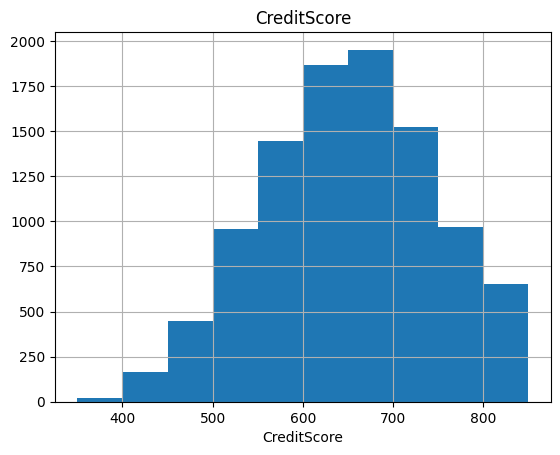

count   10000.00
mean       38.92
std        10.49
min        18.00
5%         25.00
10%        27.00
20%        31.00
30%        33.00
40%        35.00
50%        37.00
60%        40.00
70%        42.00
80%        46.00
90%        53.00
95%        60.00
99%        72.00
max        92.00
Name: Age, dtype: float64


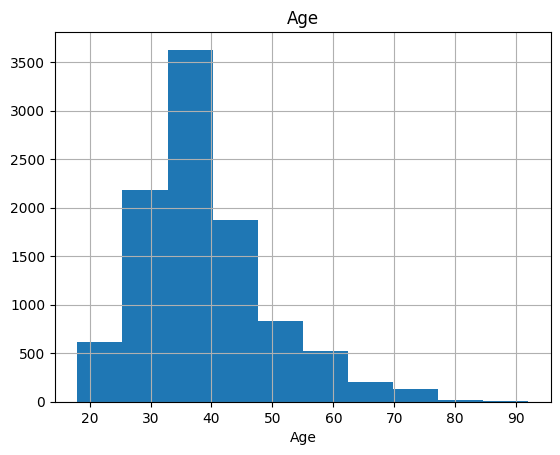

count   10000.00
mean        5.01
std         2.89
min         0.00
5%          1.00
10%         1.00
20%         2.00
30%         3.00
40%         4.00
50%         5.00
60%         6.00
70%         7.00
80%         8.00
90%         9.00
95%         9.00
99%        10.00
max        10.00
Name: Tenure, dtype: float64


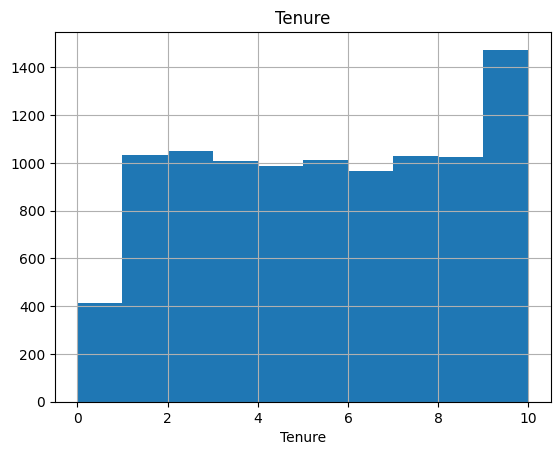

count    10000.00
mean     76485.89
std      62397.41
min          0.00
5%           0.00
10%          0.00
20%          0.00
30%          0.00
40%      73080.91
50%      97198.54
60%     110138.93
70%     122029.87
80%     133710.36
90%     149244.79
95%     162711.67
99%     185967.99
max     250898.09
Name: Balance, dtype: float64


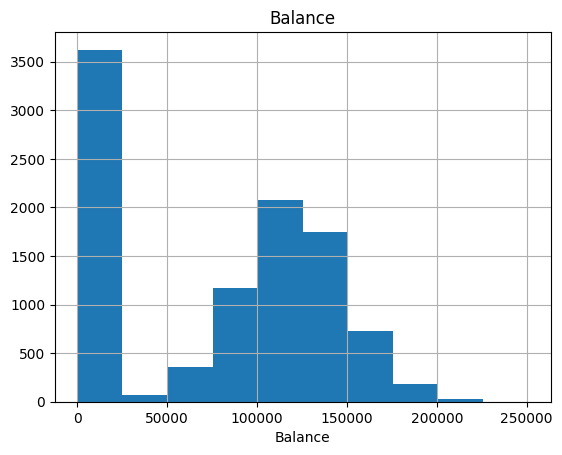

count    10000.00
mean    100090.24
std      57510.49
min         11.58
5%        9851.82
10%      20273.58
20%      41050.74
30%      60736.08
40%      80238.34
50%     100193.91
60%     119710.04
70%     139432.24
80%     159836.73
90%     179674.70
95%     190155.38
99%     198069.73
max     199992.48
Name: EstimatedSalary, dtype: float64


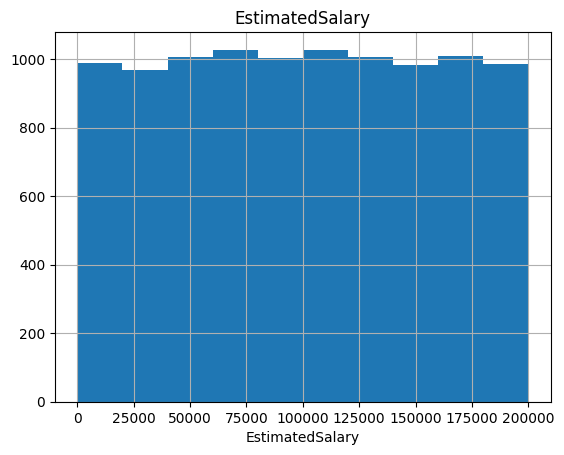

In [ ]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [ ]:
# outcome bizim bağımlı değişkenimiz olduğundan kategorik değişkenlerde geliyor. Bunu çıkarmamız gerek.
cat_cols = [col for col in cat_cols if "Churn" not in col]
cat_cols

['Geography',
 'Gender',
 'NewAge',
 'NewCreditScore',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [ ]:
#############################################
#ENCODING
#############################################

# label encoder ve one hot encoder'ın birlikte kullanımı
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
# verimizi gözlemleyelim
df.head()


CreditScore  Age  Tenure   Balance  EstimatedSalary  Churn  Geography_Germany  Geography_Spain  Gender_Male  NewAge_old  NewAge_young  NewCreditScore_low  NewCreditScore_middle  NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  HasCrCard_1  IsActiveMember_1
0          619   42       2      0.00        101348.88      1                  0                0            0           0             0                   0                      1                0                0                0            1                 1
1          608   41       1  83807.86        112542.58      0                  0                1            0           0             0                   0                      1                0                0                0            0                 1
2          502   42       8 159660.80        113931.57      1                  0                0            0           0             0                   0                      1                0                1                0            1                 0
3          699   39       1      0.00         93826.63      0                  0                0            0           0             0                   0                      0                1                0                0            0                 0
4          850   43       2 125510.82         79084.10      0                  0                1            0           0             0                   0                      0                0                0                0            1                 1

In [ ]:
# değişken isimleri küçük ya da büyük olduğu için hepsini aynı formata getiriyoruz.
df.columns = [col.upper() for col in df.columns]

# verimizi gözlemleyelim.
df.head()

CREDITSCORE  AGE  TENURE   BALANCE  ESTIMATEDSALARY  CHURN  GEOGRAPHY_GERMANY  GEOGRAPHY_SPAIN  GENDER_MALE  NEWAGE_OLD  NEWAGE_YOUNG  NEWCREDITSCORE_LOW  NEWCREDITSCORE_MIDDLE  NUMOFPRODUCTS_2  NUMOFPRODUCTS_3  NUMOFPRODUCTS_4  HASCRCARD_1  ISACTIVEMEMBER_1
0          619   42       2      0.00        101348.88      1                  0                0            0           0             0                   0                      1                0                0                0            1                 1
1          608   41       1  83807.86        112542.58      0                  0                1            0           0             0                   0                      1                0                0                0            0                 1
2          502   42       8 159660.80        113931.57      1                  0                0            0           0             0                   0                      1                0                1                0            1                 0
3          699   39       1      0.00         93826.63      0                  0                0            0           0             0                   0                      0                1                0                0            0                 0
4          850   43       2 125510.82         79084.10      0                  0                1            0           0             0                   0                      0                0                0                0            1                 1

In [ ]:
# son olarak kategorik, numerik değişkenlerimize bakalım
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols

[]

In [ ]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float"]]
num_but_cat

['CHURN']

In [ ]:
cat_cols = cat_cols + num_but_cat
cat_cols

['CHURN']

In [ ]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_car

[]

In [ ]:
cat_cols = [col for col in cat_cols if "Churn" not in col]
cat_cols

['CHURN']

In [ ]:
# numerik değişkenler
num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float"]]
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols


['CREDITSCORE', 'AGE', 'TENURE', 'BALANCE', 'ESTIMATEDSALARY']

In [ ]:
# bu fonksiyonun görevi kendisine gelen fonksiyonun alt ve üst eşik değerini hesaplar
# aykırı değerlere bakarız.
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
# aykırı değer var mı yok mu sorusunu sorar
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
# numerik değişkenlerin içinde aykırı değer var mı yok mu kontrol edelim
for col in num_cols:
  print(col, check_outlier(df, col, 0.05, 0.95))

# aykırı değer görünmüyor.

CREDITSCORE False
AGE False
TENURE False
BALANCE False
ESTIMATEDSALARY False


In [ ]:
#################################################
# STANDARTLAŞTIRMA
#################################################

# Standartlaştırma
# Standartlaştırma
# dataframemimizdeki numerik değişkenleri standartlaştırıyoruz
# model dengesiz olduğu için ilk önce minmax denedim ancak başarı oranları çok düşük olduğundan standart scaler kullandım.
X_scaled = StandardScaler().fit_transform(df[num_cols])
# standartlaştırılan numerik değişkenleri isimlendirmeleriyle beraber tekrar dataframemize atıyoruz
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

In [ ]:
# bağımlı değişkenimiz
y = df["CHURN"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: CHURN, Length: 10000, dtype: int64

In [ ]:
# bağımsız değişkenlerimiz.
X = df.drop(["CHURN"], axis=1)
X

CREDITSCORE   AGE  TENURE  BALANCE  ESTIMATEDSALARY  GEOGRAPHY_GERMANY  GEOGRAPHY_SPAIN  GENDER_MALE  NEWAGE_OLD  NEWAGE_YOUNG  NEWCREDITSCORE_LOW  NEWCREDITSCORE_MIDDLE  NUMOFPRODUCTS_2  NUMOFPRODUCTS_3  NUMOFPRODUCTS_4  HASCRCARD_1  ISACTIVEMEMBER_1
0           -0.33  0.29   -1.04    -1.23             0.02                  0                0            0           0             0                   0                      1                0                0                0            1                 1
1           -0.44  0.20   -1.39     0.12             0.22                  0                1            0           0             0                   0                      1                0                0                0            0                 1
2           -1.54  0.29    1.03     1.33             0.24                  0                0            0           0             0                   0                      1                0                1                0            1                 0
3            0.50  0.01   -1.39    -1.23            -0.11                  0                0            0           0             0                   0                      0                1                0                0            0                 0
4            2.06  0.39   -1.04     0.79            -0.37                  0                1            0           0             0                   0                      0                0                0                0            1                 1
...           ...   ...     ...      ...              ...                ...              ...          ...         ...           ...                 ...                    ...              ...              ...              ...          ...               ...
9995         1.25  0.01   -0.00    -1.23            -0.07                  0                0            1           0             0                   0                      0                1                0                0            1                 0
9996        -1.39 -0.37    1.72    -0.31             0.03                  0                0            1           0             0                   0                      1                0                0                0            1                 1
9997         0.60 -0.28    0.69    -1.23            -1.01                  0                0            0           0             0                   0                      0                0                0                0            0                 1
9998         1.26  0.29   -0.70    -0.02            -0.13                  1                0            1           0             0                   0                      0                1                0                0            1                 0
9999         1.46 -1.04   -0.35     0.86            -1.08                  0                0            0           0             1                   0                      0                0                0                0            1                 0

[10000 rows x 17 columns]

In [ ]:
######################################
#PCA
######################################

In [ ]:
# pca model nesnemizi getirelim.
pca = PCA()

In [ ]:
# fit transform edelim
pca_fit = pca.fit_transform(df)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)
# bir değişken %16 oranında, iki değişken %31, üç değişken %46, dört değişken %61, beş değişken %75 oranında, 8 değişken %86

array([0.16196619, 0.31987793, 0.46793714, 0.61122582, 0.75224157,
       0.79165777, 0.82667027, 0.86030513, 0.88994816, 0.91816563,
       0.94408643, 0.96254194, 0.97665075, 0.99025726, 0.99364924,
       0.9967215 , 0.99917584, 1.        ])

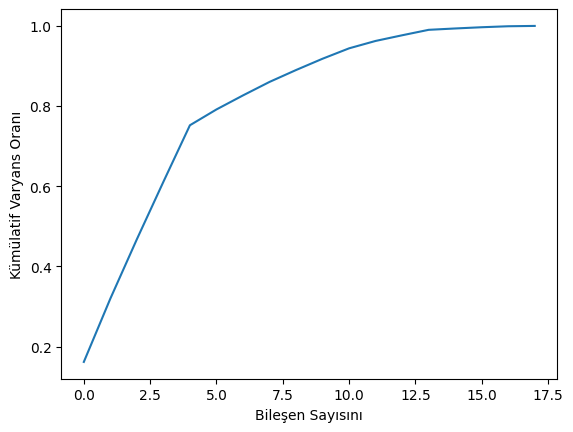

In [ ]:
################################
# Optimum Bileşen Sayısı
################################
# elbow yöntemiyle en keskin geçişin en kayda değer
# değişimin nerede olduğuna karar verebiliyoruz

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [ ]:
# en keskin geçiş 5 bileşenin olduğu yerde görülüyor.
# Ancak %85 üstünü alıyoruz bu yüzden 8 değişkene indiriyoruz
# yani sekiz değişkene indirilebilir %86 oranında açıklıyor diyebiliriz.

In [ ]:
################################
# Final PCA'in Oluşturulması
################################

# bileşen sayısını üç yazıp fit transform diyerek bileşenleri oluşturduk.
pca = PCA(n_components=8)
pca_fit = pca.fit_transform(df)

# varyans oranımıza bakalım
pca.explained_variance_ratio_
# birbirleriyle olan başarısına bakalım. %86
# üç değişkenin toplam ne kadar bilgi açıkladığını öğrenmiş olduk.
np.cumsum(pca.explained_variance_ratio_)

array([0.16196619, 0.31987793, 0.46793714, 0.61122582, 0.75224157,
       0.79165777, 0.82667027, 0.86030513])

In [ ]:
##################################
# PCA İKİ BOYUTTA GÖRSELLEŞTİRME
##################################

In [ ]:
def create_pca_df(X, y):
    # standartlaştırma işlemi
    X = StandardScaler().fit_transform(X)
    # pca hesabı
    pca = PCA(n_components=2)
    # bileşenleri çıkaracak
    pca_fit = pca.fit_transform(X)
    # data frame çevirecek
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    # bağımlı değişkenle yan yana birleştirecek
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

# iki değişkene indirgemiş olduk.
# fonksiyonu uygulayalım
pca_df = create_pca_df(X, y)

In [ ]:
# görselleştirelim
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50, alpha =0.3 )
    ax.legend(targets)
    ax.grid()
    plt.show()

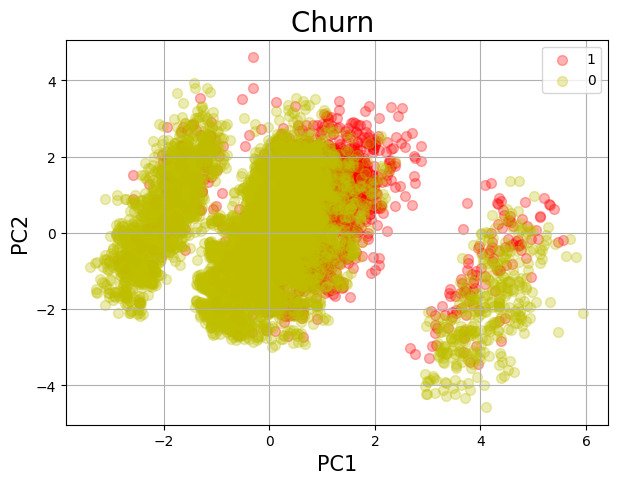

In [ ]:
# fonksiyonu uygulayalım
plot_pca(pca_df, "CHURN")

In [ ]:
####################################################
# Base Machine Learning Models
####################################################

In [ ]:
# churn durumu bir sınıflandırma problemi olduğundan burada sınıflandırma algoritmaları kullanacağız

# kullanacağımız algoritmalar:

# logistic regression
# KNN
# Decision Trees
# Support Vector Machine
# RandomForestClassifier
# GradientBoostingClassifier
# XGBoost
# LightGBM
# CatBoost

In [ ]:
# bağımsız değişkenlerimiz.
X = df.drop(["CHURN"], axis=1)
X

CREDITSCORE   AGE  TENURE  BALANCE  ESTIMATEDSALARY  GEOGRAPHY_GERMANY  GEOGRAPHY_SPAIN  GENDER_MALE  NEWAGE_OLD  NEWAGE_YOUNG  NEWCREDITSCORE_LOW  NEWCREDITSCORE_MIDDLE  NUMOFPRODUCTS_2  NUMOFPRODUCTS_3  NUMOFPRODUCTS_4  HASCRCARD_1  ISACTIVEMEMBER_1
0           -0.33  0.29   -1.04    -1.23             0.02                  0                0            0           0             0                   0                      1                0                0                0            1                 1
1           -0.44  0.20   -1.39     0.12             0.22                  0                1            0           0             0                   0                      1                0                0                0            0                 1
2           -1.54  0.29    1.03     1.33             0.24                  0                0            0           0             0                   0                      1                0                1                0            1                 0
3            0.50  0.01   -1.39    -1.23            -0.11                  0                0            0           0             0                   0                      0                1                0                0            0                 0
4            2.06  0.39   -1.04     0.79            -0.37                  0                1            0           0             0                   0                      0                0                0                0            1                 1
...           ...   ...     ...      ...              ...                ...              ...          ...         ...           ...                 ...                    ...              ...              ...              ...          ...               ...
9995         1.25  0.01   -0.00    -1.23            -0.07                  0                0            1           0             0                   0                      0                1                0                0            1                 0
9996        -1.39 -0.37    1.72    -0.31             0.03                  0                0            1           0             0                   0                      1                0                0                0            1                 1
9997         0.60 -0.28    0.69    -1.23            -1.01                  0                0            0           0             0                   0                      0                0                0                0            0                 1
9998         1.26  0.29   -0.70    -0.02            -0.13                  1                0            1           0             0                   0                      0                1                0                0            1                 0
9999         1.46 -1.04   -0.35     0.86            -1.08                  0                0            0           0             1                   0                      0                0                0                0            1                 0

[10000 rows x 17 columns]

In [ ]:
# bağımlı değişkenimiz
y = df["CHURN"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: CHURN, Length: 10000, dtype: int64

# Logistic regression

In [ ]:
# veri setimizi bölmemiz gerekiyor.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [ ]:
X_train.shape

(7500, 17)

In [ ]:
X_test.shape

(2500, 17)

In [ ]:
# lojistik regresyon modelini getiriyorum
log_model = LogisticRegression().fit(X_train, y_train)

In [ ]:
# cross validationu getiriyoruz
cv_results = cross_validate(log_model, X_train, y_train, cv=5, scoring=["accuracy"])

In [ ]:
log_accuracy = cv_results['test_accuracy']

In [ ]:
logafter = log_accuracy.mean()
logafter

0.8529333333333333

# KNN

In [ ]:
# veri setimizi bölmemiz gerekiyor.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [ ]:
# modelimizi kuruyoruz.
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
cv_results = cross_validate(knn_model, X_train, y_train, cv=5, scoring=["accuracy"])
cv_results

knnbefore = cv_results['test_accuracy'].mean()
knnbefore

0.8314285714285715

In [ ]:
# modelin parametrelerini getirelim
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
##########################################
# 5. Hyperparameter Optimization
##########################################

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# 'n_neighbors': 5
# amacım komşuluk parametresini değiştirerek olması gereken optimum komşu sayısını bulmak
# 2den 50ye kadar sayılar oluşturdum.
knn_params = {"n_neighbors": range(3, 20, 2) } # DIGER PARAMETRELER

In [ ]:
# gridsearchcv ile komşu sayısına bakacağız
# bana der ki modeli ver,
# hangi parametre setini kullanacaksın
# kaç katlı cv yapacaksın onu ver. Bununla hatamıza bakacağız
# n_jobs argümanı -1 olduğunda işlemcileri tam performans ile kullanır
# verbose argümanı = 1 dersek rapor verir
knn_gs_best = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
# çağıralım
knn_gs_best.best_params_

{'n_neighbors': 7}

In [ ]:
########################################
# 6. Final Model
########################################

In [ ]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X_train, y_train)

# modelin test hatasına bakalım
cv_results = cross_validate(knn_final, X_train, y_train, cv=5, scoring=["accuracy"])
cv_results

knn_accuracy = cv_results['test_accuracy']
knnafter = knn_accuracy.mean()

In [ ]:
knnafter

0.8362857142857143

In [ ]:
print(f"before:{knnbefore}  after: {knnafter}")

before:0.8314285714285715  after: 0.8362857142857143


# DECISION TREES

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [ ]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

cv_results = cross_validate(cart_model, X_train, y_train, cv=5, scoring=["accuracy"])

cartbefore = cv_results['test_accuracy'].mean()
cartbefore

0.7877142857142857

In [ ]:
################################################
# Hyperparameter Optimization with GridSearchCV
################################################

# mevcut modelin hiperparametrelerine bakalım
# bizim için önemli olan min sanple split bu overfite sebep olan parametrelere sebep olabilir deriz.
# max dept paratmerise de bizim için önemlidir. ağacın deinliği için önemlidir.
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [ ]:
cart_params = {'max_depth': range(3, 11, 2),
               "min_samples_split": range(2, 20, 4)}

In [ ]:
cart_best_grid = GridSearchCV(cart_model, cart_params, cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# en iyi değerler
cart_best_grid.best_params_

{'max_depth': 7, 'min_samples_split': 14}

In [ ]:
################################################
# Final Model
################################################

In [ ]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X_train, y_train)
# model başarımızı değerlendirelim
cv_results = cross_validate(cart_final,X_train, y_train, cv= 5, scoring=["accuracy"])

# accuracy
cart_accuracy = cv_results['test_accuracy']
cartafter = cart_accuracy.mean()
cartafter


0.85

In [ ]:
# değişkenlerin önem düzeylerine bakalım
cart_final.feature_importances_

array([0.01869169, 0.38229828, 0.00417052, 0.10899663, 0.0262732 ,
       0.03839072, 0.        , 0.00403857, 0.        , 0.        ,
       0.        , 0.00231005, 0.18366241, 0.09650567, 0.0288064 ,
       0.        , 0.10585585])

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    # future importancesi sözlük yardımıya değer ve değişken olarak burada tutuyoruz
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    # sütun grafiği ile görselleştiriyoruz.
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    # küçükten büyüğe sıraladıktan sonra göster diyoruz sort values var
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    # kaydetmek için
    if save:
        plt.savefig('importances.png')

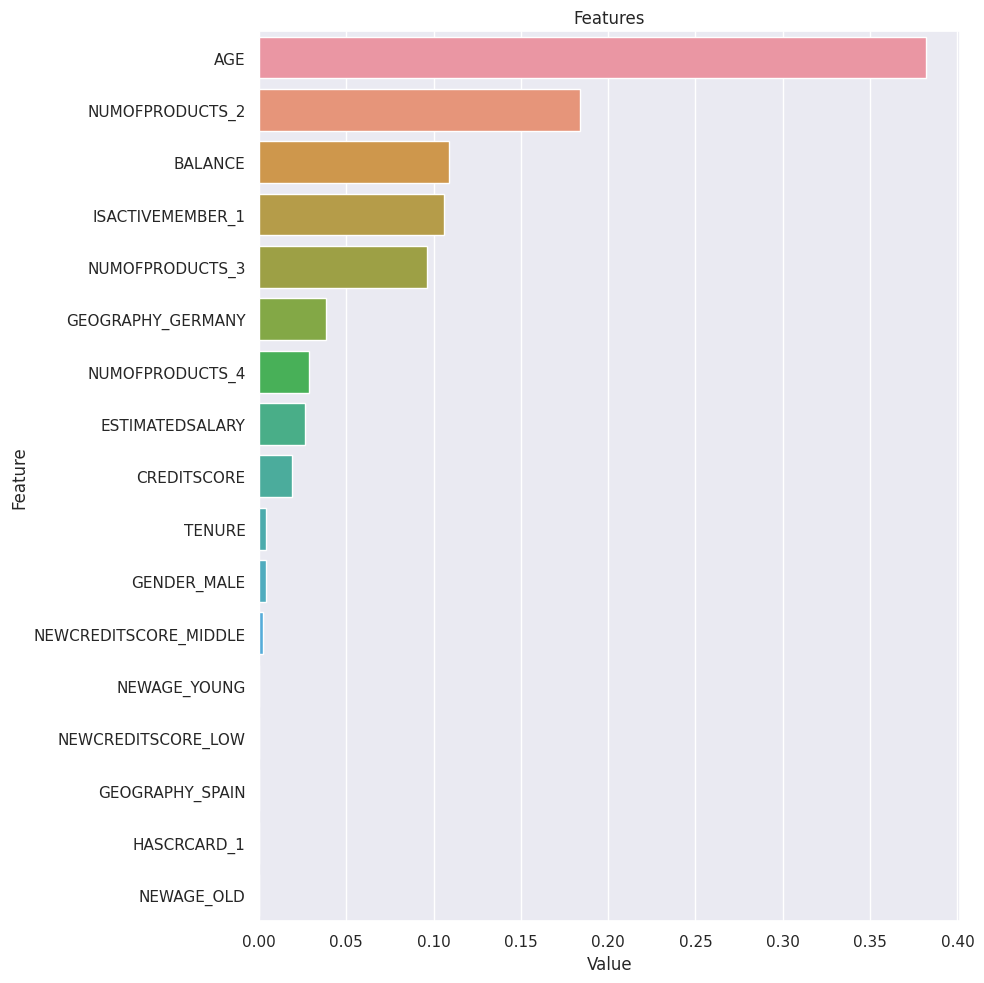

In [ ]:
plot_importance(cart_final, X)


In [ ]:
########################################
# MODEL KARMAŞIKLIĞI EĞRİSİ
########################################

In [ ]:
# öğrenme eğrilerini kullanarak model karmaşıklığını analiz edeceğiz.
# modelden modele farklılık gösterebilir.

# validation_curve kullanacağız.
# bu metod der ki;
# bana modelini göster
# bağımsız değişkenleri göster
# bağımlı değişkenleri göster
# parametremizi gireceğiz
# parametre aralığını vereceğiz
# skor yöntemibi gireceğiz
# kaç katlı doğrulama olsun deriz.
# 10 tane parametre için 10 tane cv yapılır

train_score, test_score = validation_curve(cart_final, X, y,
                                           param_name="max_depth",
                                           param_range=range(1, 11),
                                           scoring="accuracy",
                                           cv=10)

In [ ]:
train_score

array([[0.79633333, 0.79633333, 0.79633333, 0.79633333, 0.79633333,
        0.79633333, 0.79633333, 0.79622222, 0.79622222, 0.79622222],
       [0.82233333, 0.82344444, 0.82066667, 0.823     , 0.82266667,
        0.82233333, 0.82222222, 0.82111111, 0.82166667, 0.82255556],
       [0.84344444, 0.84433333, 0.843     , 0.84333333, 0.84344444,
        0.84422222, 0.844     , 0.84344444, 0.84555556, 0.84433333],
       [0.84688889, 0.85244444, 0.84988889, 0.85122222, 0.84466667,
        0.85211111, 0.85177778, 0.85088889, 0.85311111, 0.852     ],
       [0.85644444, 0.85933333, 0.85655556, 0.85811111, 0.852     ,
        0.85655556, 0.85588889, 0.85677778, 0.85866667, 0.85911111],
       [0.86355556, 0.86755556, 0.86355556, 0.86522222, 0.86344444,
        0.86522222, 0.86555556, 0.86011111, 0.86588889, 0.86533333],
       [0.86855556, 0.87188889, 0.86855556, 0.87166667, 0.87022222,
        0.87111111, 0.86944444, 0.86788889, 0.87011111, 0.86888889],
       [0.87522222, 0.878     , 0.8757777

In [ ]:
test_score

array([[0.796, 0.796, 0.796, 0.796, 0.796, 0.796, 0.796, 0.797, 0.797,
        0.797],
       [0.821, 0.811, 0.836, 0.815, 0.818, 0.821, 0.822, 0.832, 0.827,
        0.819],
       [0.848, 0.84 , 0.852, 0.849, 0.848, 0.841, 0.843, 0.848, 0.829,
        0.84 ],
       [0.849, 0.843, 0.862, 0.853, 0.848, 0.845, 0.849, 0.854, 0.834,
        0.847],
       [0.848, 0.846, 0.864, 0.851, 0.853, 0.844, 0.852, 0.86 , 0.845,
        0.839],
       [0.856, 0.846, 0.867, 0.861, 0.852, 0.847, 0.86 , 0.859, 0.85 ,
        0.846],
       [0.857, 0.844, 0.865, 0.857, 0.847, 0.841, 0.859, 0.866, 0.853,
        0.846],
       [0.845, 0.842, 0.875, 0.857, 0.844, 0.838, 0.858, 0.869, 0.86 ,
        0.843],
       [0.843, 0.85 , 0.867, 0.85 , 0.847, 0.837, 0.855, 0.859, 0.856,
        0.848],
       [0.838, 0.846, 0.859, 0.847, 0.844, 0.829, 0.837, 0.857, 0.844,
        0.847]])

In [ ]:
# yukarıdaki hataların ortalamasını alırız deneme ve test hatalarınımızı görmüş oluruz.
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)

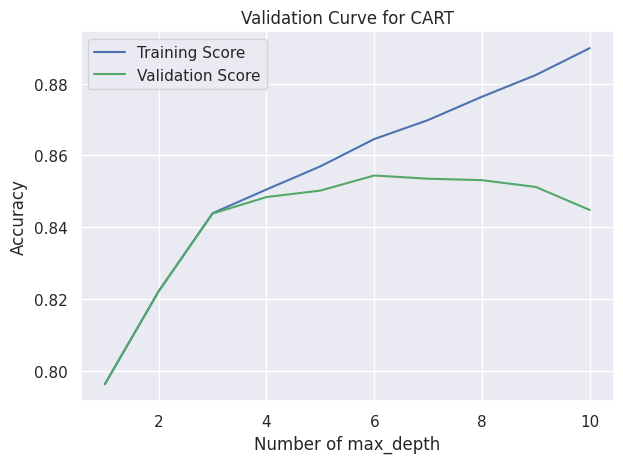

In [ ]:
# görselleştirip gözlemleyelim
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')
# validasyon ve test aynı şeydir
plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [ ]:
print(f"before: {cartbefore}  after: {cartafter}")

before: 0.7877142857142857  after: 0.85


# Support Vector Machine

In [ ]:
# veri setimizi bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
# modelimizi kuruyoruz
svc_model = SVC(random_state=17).fit(X_train, y_train)
cv_results = cross_validate(svc_model, X_train, y_train, cv=5, scoring=["accuracy"])
svcbefore = cv_results["test_accuracy"].mean()
svcbefore

0.8578571428571429

In [ ]:
#########################################
# HİPERPARAMETRE OPTİMİZASYONU
#########################################

svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 17,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
svc_params = {"C":[0.1,1, 10, 100],
              'gamma': [0.1,0.01,0.001],
              'probability':[True],
              'kernel': ['poly'],
              'degree':[2,3]}

svc_best_grid = GridSearchCV(svc_model, svc_params, cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)
svc_best_grid.best_params_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}

In [ ]:
##########################################
# FİNAL MODEL
##########################################

svc_final = SVC(**svc_best_grid.best_params_, random_state=17).fit(X_train, y_train)
cv_results = cross_validate(svc_final, X_train, y_train, cv=5, scoring=["accuracy"])
svc_accuracy = cv_results["test_accuracy"]
svcafter = svc_accuracy.mean()
svcafter

0.8531428571428572

In [ ]:
print(f"before: {svcbefore}   after: {svcafter}")

before: 0.8578571428571429   after: 0.8531428571428572


# RandomForestClassifier

In [ ]:
# veri setimizi bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
# modelimizi kuruyoruz
rf_model = RandomForestClassifier(random_state=17).fit(X_train, y_train)
cv_results = cross_validate(rf_model, X_train, y_train, cv=5, scoring=["accuracy"])
rfbefore = cv_results["test_accuracy"].mean()
rfbefore

0.8611428571428572

In [ ]:
#########################################
# HİPERPARAMETRE OPTİMİZASYONU
#########################################

rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

In [ ]:
# şimdi GridSearchCV yöntemini kullanarak bu parametrelerde arama yapmamız gerekiyor.
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)
# sonuçları görelim.
rf_best_grid.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 15,
 'n_estimators': 500}

In [ ]:
##########################################
# FİNAL MODEL
##########################################

rf_final = RandomForestClassifier(**rf_best_grid.best_params_, random_state=17).fit(X_train, y_train)
cv_results = cross_validate(rf_final, X_train, y_train, cv=5, scoring=["accuracy"])
rf_accuracy = cv_results["test_accuracy"]
rfafter = rf_accuracy.mean()
rfafter

0.867

In [ ]:
# değişkenlerin önem düzeylerine bakalım
rf_final.feature_importances_

array([0.09118283, 0.26858406, 0.04981337, 0.12474941, 0.09357704,
       0.03879118, 0.00896863, 0.01486383, 0.00993892, 0.01246276,
       0.00546887, 0.0085375 , 0.10988471, 0.07086523, 0.01647596,
       0.01074958, 0.06508611])

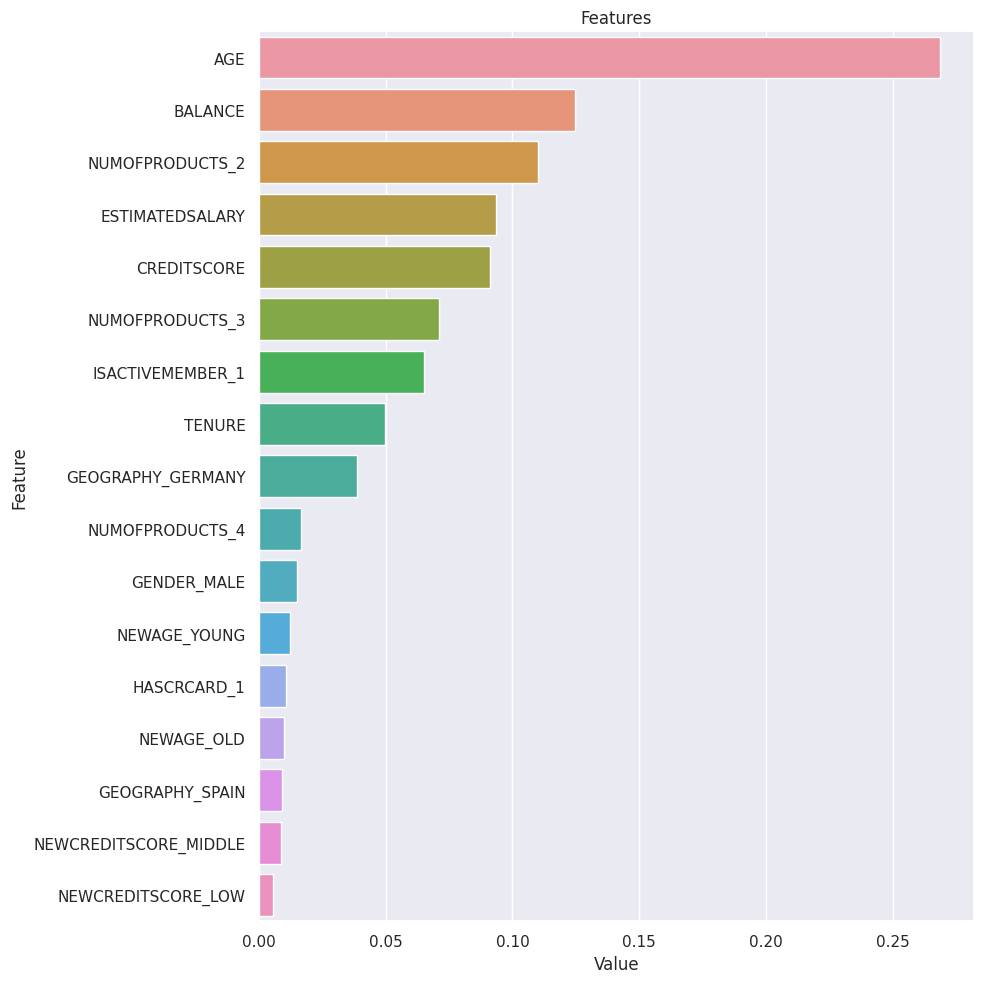

In [ ]:
# görselleştirelim
plot_importance(rf_final, X)

In [ ]:
print(f"before: {rfbefore}   after: {rfafter}")

before: 0.8611428571428572   after: 0.867


# GradientBoostingClassifier

In [ ]:
# veri setimizi bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
# modelimizi kuruyoruz
gbm_model = GradientBoostingClassifier(random_state=17).fit(X_train, y_train)
cv_results = cross_validate(gbm_model, X_train, y_train, cv=5, scoring=["accuracy"])
gbmbefore = cv_results["test_accuracy"].mean()
gbmbefore

0.8625714285714287

In [ ]:
#########################################
# HİPERPARAMETRE OPTİMİZASYONU
#########################################

gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 17,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# gbm için aranacak olan hiperparametre setini getirelim.
gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8, 10],
              "n_estimators": [100, 500, 1000],
              "subsample": [1, 0.5, 0.7]}

In [ ]:
# en iyi parametreleri gridsearchcv ile arıyoruz
gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)
# en iyi parametreleri görelim
gbm_best_grid.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

In [ ]:
##########################################
# FİNAL MODEL
##########################################

gbm_final = GradientBoostingClassifier(**gbm_best_grid.best_params_, random_state=17).fit(X_train, y_train)
cv_results = cross_validate(gbm_final, X_train, y_train, cv=5, scoring=["accuracy"])
gbm_accuracy = cv_results["test_accuracy"]
gbmafter = gbm_accuracy.mean()
gbmafter

0.866

In [ ]:
gbm_final.feature_importances_

array([4.45250201e-02, 3.37607535e-01, 1.10626486e-02, 9.99837274e-02,
       4.20424065e-02, 5.62474049e-02, 1.68189234e-03, 1.56271866e-02,
       1.75262199e-06, 7.66922480e-05, 0.00000000e+00, 5.41297469e-04,
       1.58350470e-01, 8.56793841e-02, 2.46406535e-02, 1.09132800e-03,
       1.20840601e-01])

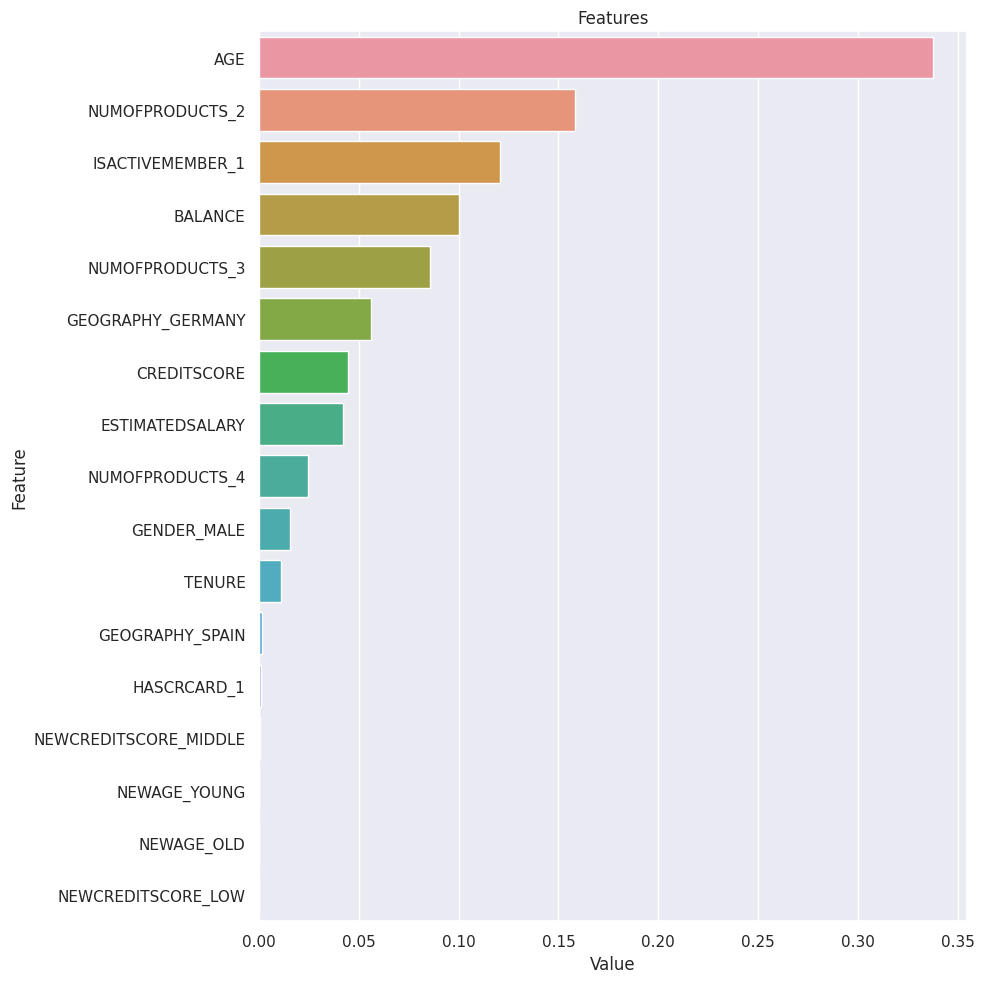

In [ ]:
plot_importance(gbm_final, X)

In [ ]:
print(f"before: {gbmbefore}   after: {gbmafter}")

before: 0.8625714285714287   after: 0.866


# XGBoost

In [ ]:
# veri setimizi bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
# modelimizi kuruyoruz
xgboost_model = XGBClassifier(random_state=17).fit(X_train, y_train)
cv_results = cross_validate(xgboost_model, X_train, y_train, cv=5, scoring=["accuracy"])
xgbbefore = cv_results["test_accuracy"].mean()
xgbbefore

0.8581428571428571

In [ ]:
#########################################
# HİPERPARAMETRE OPTİMİZASYONU
#########################################

xgboost_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 17,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
# XGBoost için parametreleri girelim
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, None],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [None, 0.7, 1]}

In [ ]:
# en iyi parametreleri gridsearchcv ile arıyoruz
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
# en iyi parametreleri görelim
xgboost_best_grid.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': None,
 'n_estimators': 100}

In [ ]:
##########################################
# FİNAL MODEL
##########################################

xgboost_final = XGBClassifier(**xgboost_best_grid.best_params_, random_state=17).fit(X_train, y_train)
cv_results = cross_validate(xgboost_final, X_train, y_train, cv=5, scoring=["accuracy"])
xgb_accuracy = cv_results["test_accuracy"]
xgbafter = xgb_accuracy.mean()
xgbafter

0.8645714285714285

In [ ]:
xgboost_final.feature_importances_

array([0.01775742, 0.07101837, 0.01440148, 0.03504645, 0.01858511,
       0.06299011, 0.01851443, 0.0206497 , 0.03637527, 0.06357844,
       0.01796227, 0.01659783, 0.30204672, 0.14148691, 0.05416824,
       0.01402777, 0.09479351], dtype=float32)

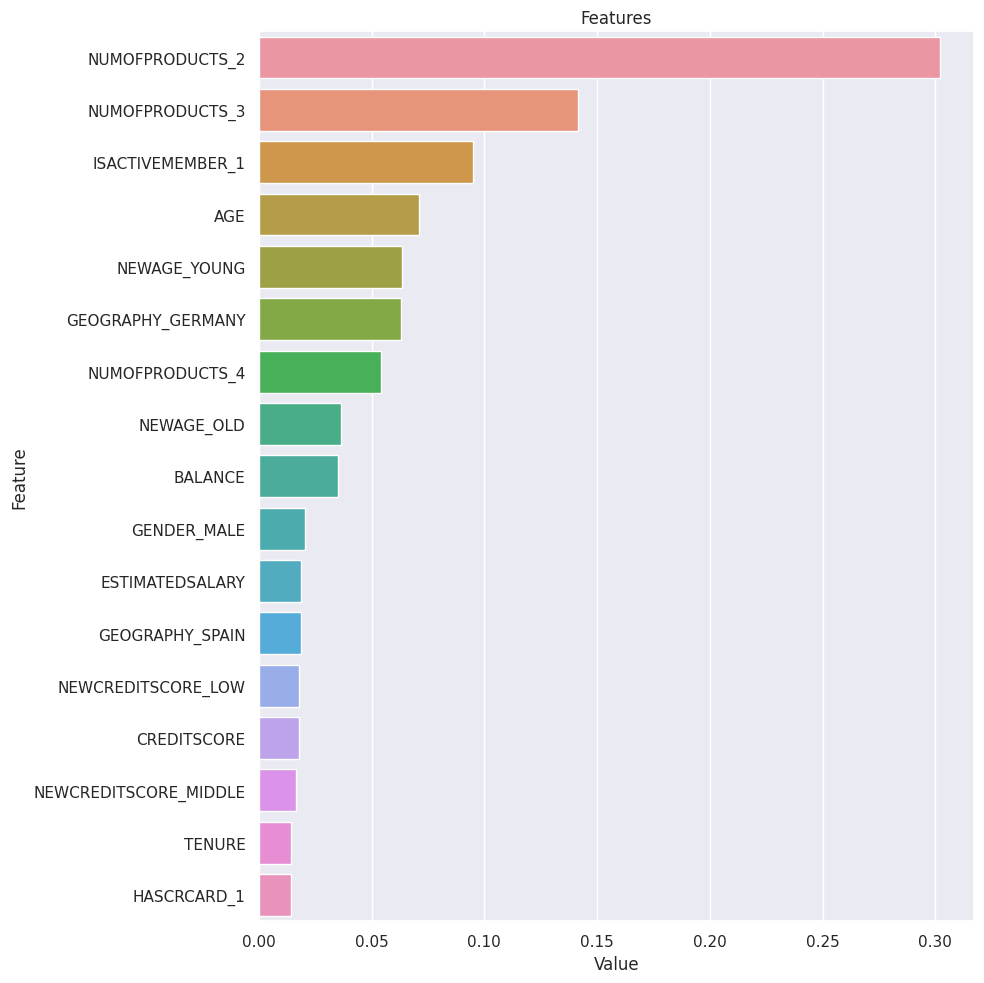

In [ ]:
# görselleştirelim
plot_importance(xgboost_final, X)

In [ ]:
print(f"before: {xgbbefore}   after: {xgbafter}")

before: 0.8581428571428571   after: 0.8645714285714285


# LightGBM

In [ ]:
# veri setimizi bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
# modelimizi kuruyoruz
lgbm_model = LGBMClassifier(random_state=17).fit(X_train, y_train)
cv_results = cross_validate(lgbm_model, X_train, y_train, cv=5, scoring=["accuracy"])
lgbmbefore = cv_results["test_accuracy"].mean()
lgbmbefore

0.8642857142857142

In [ ]:
#########################################
# HİPERPARAMETRE OPTİMİZASYONU
#########################################

lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
lgbm_params = {"learning_rate": [0.01, 0.02, 0.05, 0.1],
               "n_estimators": [200, 300, 350, 400],
               "colsample_bytree": [0.9, 0.8, 1]}

In [ ]:
# en iyi parametreleri bulmak için gridsearchcv yapıyoruz
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)

# en iyi parametrelere bakalım
lgbm_best_grid.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'colsample_bytree': 0.8, 'learning_rate': 0.02, 'n_estimators': 200}

In [ ]:
##########################################
# FİNAL MODEL
##########################################

lgbm_final = LGBMClassifier(**lgbm_best_grid.best_params_, random_state=17).fit(X_train, y_train)
cv_results = cross_validate(lgbm_final, X_train, y_train, cv=5, scoring=["accuracy"])
lgbmafter = cv_results["test_accuracy"].mean()
lgbm_accuracy = cv_results["test_accuracy"]
lgbmafter = lgbm_accuracy.mean()
lgbmafter

0.8645714285714285

In [ ]:
lgbm_final.feature_importances_

array([ 806,  936,  387, 1430,  765,  265,   79,  220,   13,   36,    6,
         45,  251,  228,  112,   88,  333], dtype=int32)

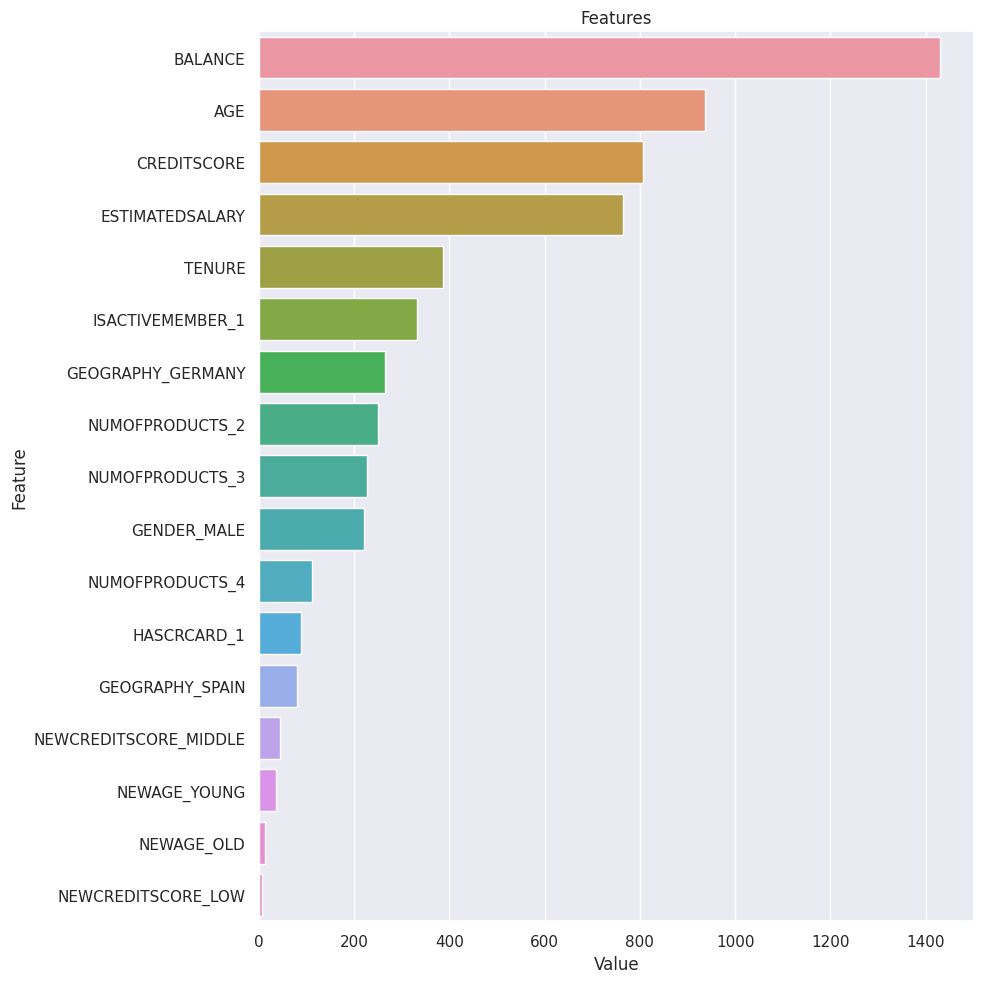

In [ ]:
plot_importance(lgbm_final,X)

In [ ]:
print(f"before: {lgbmbefore}   after: {lgbmafter}")

before: 0.8642857142857142   after: 0.8645714285714285


# SUPER LEARNER

In [ ]:
SL = SuperLearner(folds=5, random_state=42)

In [ ]:
# en iyi sonucu veren 4 modeli ekliyorum
SL.add([rf_final, xgboost_final, gbm_final, lgbm_final])

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [ ]:
SL.add_meta(MLPClassifier())

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [ ]:
cross_val_SL_Acc = cross_val_score(SL, X_train, y_train, cv = 5, scoring = 'accuracy')
cross_val_SL_f1 = cross_val_score(SL, X_train, y_train, cv = 5, scoring = 'f1')
cross_val_SL_AUC = cross_val_score(SL, X_train, y_train, cv = 5, scoring = 'roc_auc')

# SONUÇLAR

In [ ]:
# modellerin sonuçlarını dataframe çevirelim ve net bir şekilde görelim

In [ ]:
# en iyi sonucu random forest algoritması vermiştir

In [ ]:
# iki tane seri oluşturuyoruz
model_isimleri = pd.Series(["KNN", "CART", "SVC", "Random Forests", "GradientBoosting", "XGBOOST", "LightGBM", "SuperLearner"])
before = pd.Series([knnbefore, cartbefore, svcbefore, rfbefore, gbmbefore, xgbbefore, lgbmbefore])
after = pd.Series([knnafter, cartafter, svcafter, rfafter, gbmafter, xgbafter, lgbmafter,cross_val_SL_Acc.mean()])
aciklama = pd.Series(["","","","BEST MODEL","","","",""])
pd.set_option("display.float_format", lambda x: "%.4f" % x)
sonuclar = {"Modeller": model_isimleri, "ACCURACY MEAN ÖNCESİ":before, "ACCURACY MEAN SONRASI":after, "AÇIKLAMA":aciklama}
df_sonuclar = pd.DataFrame(sonuclar)
df_sonuclar.style.background_gradient(cmap='PuBu')



In [ ]:
d1 = {'Logistic Regression':log_accuracy, 'Random Forest':rf_accuracy, 'KNN':knn_accuracy, 'Decision Tree':cart_accuracy,
     'XG Boost':xgb_accuracy, 'Super Learner':cross_val_SL_Acc, "SVC": svc_accuracy, "GBM":gbm_accuracy}
d_accuracy = pd.DataFrame(data = d1)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(name='Logistic Regression', y=d_accuracy.iloc[:,0]))
fig.add_trace(go.Box(name='Random Forest', y=d_accuracy.iloc[:,1]))
fig.add_trace(go.Box(name='KNN', y=d_accuracy.iloc[:,2]))
fig.add_trace(go.Box(name='Decision Tree', y=d_accuracy.iloc[:,3]))
fig.add_trace(go.Box(name='XG Boost', y=d_accuracy.iloc[:,4]))
fig.add_trace(go.Box(name='Super Learner', y=d_accuracy.iloc[:,5]))
fig.add_trace(go.Box(name='SVC', y=d_accuracy.iloc[:,6]))
fig.add_trace(go.Box(name='GBM', y=d_accuracy.iloc[:,7]))

fig.update_traces(boxpoints='all', boxmean=True)

fig.update_layout(title_text='<b>Box Plots for Models Accuracy (train)<b>')

In [ ]:
  # Modellerin başarı oranını incelediğimizde en iyi sonucu veren modelin Random forest modeli olduğu görülüyor.

# PREDICTING

In [ ]:
# değişkenlerimize bakalım
X.columns
# random user diyerek rastgele bir katılımcı seçelim.
random_user = X.sample(1, random_state=45)
# rastgele katılımcımıza bakalım.
random_user
# Tahminleyelim
rf_final.predict(random_user)

array([0])

# MODELİ KAYDETME

In [ ]:
# modeli kaydediyoruz
joblib.dump(rf_final, "rf_final.pkl")

['rf_final.pkl']